In [1]:
import random
import math

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer

import multiprocessing as mp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
path = '/Users/wenyuzeng/Downloads/'
xls = pd.ExcelFile(path + 'assay_list.xls')
df = []
for i in range(len(xls.sheet_names)):
    df1 = xls.parse(i)
    df.append(df1)

len(df)

22

In [4]:
xls2 = pd.ExcelFile(path + 'assay_list2.xls')

for i in range(len(xls2.sheet_names)):
    df1 = xls2.parse(i)
    df.append(df1)

len(df)

50

In [5]:
protocols = [df[i].columns[1] for i in range(len(df))]
print(len(protocols))
protocols

50


['tox21-ahr-p1',
 'tox21-ap1-agonist-p1',
 'tox21-ar-bla-antagonist-p1',
 'tox21-ar-mda-kb2-luc-agonist-p3',
 'tox21-ar-mda-kb2-luc-antagonist-p1',
 'tox21-ar-mda-kb2-luc-antagonist-p2',
 'tox21-are-bla-p1',
 'tox21-aromatase-p1',
 'tox21-car-agonist-p1',
 'tox21-car-antagonist-p1',
 'tox21-elg1-luc-agonist-p1',
 'tox21-er-bla-antagonist-p1',
 'tox21-er-luc-bg1-4e2-agonist-p4',
 'tox21-er-luc-bg1-4e2-antagonist-p1',
 'tox21-er-luc-bg1-4e2-antagonist-p2',
 'tox21-erb-bla-antagonist-p1',
 'tox21-erb-bla-p1',
 'tox21-err-p1',
 'tox21-esre-bla-p1',
 'tox21-fxr-bla-agonist-p2',
 'tox21-fxr-bla-antagonist-p1',
 'tox21-gh3-tre-antagonist-p1',
 'tox21-gr-hela-bla-antagonist-p1',
 'tox21-h2ax-cho-p2',
 'tox21-hdac-p1',
 'tox21-hre-bla-agonist-p1',
 'tox21-hse-bla-p1',
 'tox21-mitotox-p1',
 'tox21-nfkb-bla-agonist-p1',
 'tox21-p53-bla-p1',
 'tox21-pgc-err-p1',
 'tox21-ppard-bla-agonist-p1',
 'tox21-ppard-bla-antagonist-p1',
 'tox21-pparg-bla-antagonist-p1',
 'tox21-pr-bla-agonist-p1',
 'tox21-pr

In [6]:
df[0].shape

(9683, 207)

In [8]:
one_assay = df[0]
one_assay = one_assay.drop(one_assay.columns[0], axis=1).drop_duplicates(subset = ['SMILES']) # 
one_assay

tox21-ahr-p1                                             SMILES  \
0                1  CC(C)[C@@]1(NC(=O)[C@@H]2C[C@H]3[C@@H](Cc4c[nH...   
1                0                             [nH]1c2ccccc2c3ccccc13   
2                0                   OC(=O)C(=O)Nc1cccc(c1)c2[nH]nnn2   
3                0   Cc1[nH]c2cccc(OCC(CNC(C)(C)C)OC(=O)c3ccccc3)c2c1   
4                0  C[S](O)(=O)=O.O=C1CN2[C@H]3CC(C[C@@H]2CC1C3)OC...   
...            ...                                                ...   
9676             0                         Clc1ccc(OCC(O)COC(N)=O)cc1   
9678             0  O=S(=O)(O)O.C[C@@H](CC)CCCCC(=O)N[C@@H](CCN)C(...   
9679             0                          Cl.O=S(N)(=O)c1ccc(CN)cc1   
9680             0  Oc1cc(cc(O)c1)C(O)CNC(C)C.O=S(=O)(O)O.CC(C)NCC...   
9681             0  [Na+].[O-]C(=O)CCC(=O)OCC(=O)[C@@]4(O)CC[C@@H]...   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          14.629783       -2.044999          14.629783           0.164013   
1           3.377963        1.211759           3.377963           1.211759   
2          10.951259       -1.544690          10.951259           0.353056   
3          12.496072       -0.414606          12.496072           0.088127   
4          12.609635       -3.666667          12.609635           0.035589   
...              ...             ...                ...                ...   
9676       10.248885       -0.925423          10.248885           0.008842   
9678       14.424310       -4.666667          14.424310           0.013058   
9679       10.779027       -3.568620          10.779027           0.000000   
9680        9.733565       -4.666667           9.733565           0.047595   
9681       13.079510       -1.724403          13.079510           0.000000   

           qed     MolWt  HeavyAtomMolWt   ExactMolWt  ...  fr_sulfide  \
0     0.408639   611.743         570.415   611.310769  ...           0   
1     0.528299   167.211         158.139   167.073499  ...           0   
2     0.622046   233.187         226.131   233.054889  ...           0   
3     0.593830   380.488         352.264   380.209993  ...           0   
4     0.563812   420.487         396.295   420.135507  ...           0   
...        ...       ...             ...          ...  ...         ...   
9676  0.816060   245.662         233.566   245.045486  ...           0   
9678  0.024478  1267.561        1164.745  1266.732957  ...           0   
9679  0.750448   222.697         211.609   222.022976  ...           0   
9680  0.224312   520.601         484.313   520.209066  ...           0   
9681  0.321723   484.521         451.257   484.207312  ...           0   

      fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0                0           0                  0             0            0   
1                0           0                  0             0            0   
2                0           0                  0             1            0   
3                0           0                  0             0            0   
4                0           0                  0             0            0   
...            ...         ...                ...           ...          ...   
9676             0           0                  0             0            0   
9678             0           0                  0             0            0   
9679             1           0                  0             0            0   
9680             0           0                  0             0            0   
9681             0           0                  0             0            0   

      fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0               0             0                 0        0  
1               0             0                 0        0  
2               0             0                 0        0  
3               0             0                 0        0  
4               0             0      

In [9]:
df_list = []
for i in range(len(df)):
    one_assay = df[i]
    one_assay = one_assay.drop(one_assay.columns[0], axis=1).drop_duplicates(subset = ['SMILES'])
    one_assay['ProtocolName'] = one_assay.columns[0]
    one_assay = one_assay.rename(columns = {one_assay.columns[0]: 'Outcome'})
    df_list.append(one_assay)
    
len(df_list)

50

In [11]:
all_compound = []
all_list = []
for i in range(len(df)):
    assay = df[i].SMILES.tolist()
    all_list.append(assay)
    for item in assay:
        all_compound.append(item)
    

total_compound = set(all_compound)

In [12]:
# total number of compounds in all 50 assays
len(total_compound)

8791

In [13]:
all_lists = all_list
intersection = all_list[0]
for lst in all_lists:
    temp_intersection = [num for num in lst if num in intersection]
    intersection = temp_intersection
# intersection    

In [14]:
# number of common compounds in all 50 assays 
len(intersection)

2631

In [15]:
t = pd.DataFrame({'Cell_Line': ['DT40','DT40', 'DT40'], 'ProtocolName':['tox21-dt40-p1_100', 'tox21-dt40-p1_653', 'tox21-dt40-p1_657']})
t

Cell_Line       ProtocolName
0      DT40  tox21-dt40-p1_100
1      DT40  tox21-dt40-p1_653
2      DT40  tox21-dt40-p1_657

In [16]:
assay_info_tox21 = pd.read_csv('assay_meta_data.csv')
assay_info_tox21 = assay_info_tox21.drop(assay_info_tox21.columns[0], axis = 1)
assay_info_tox21['Cell_Line'] = assay_info_tox21['Cell_Line'].str.replace(r'*', '', regex=True)
assay_info_tox21 = assay_info_tox21[['Cell_Line', 'ProtocolName']]
assay_info_tox21 = assay_info_tox21.drop([49])
assay_info_tox21 = pd.concat([assay_info_tox21, t]).reset_index(drop=True)
assay_info_tox21 

Cell_Line                      ProtocolName
0      HepG2                      tox21-ahr-p1
1      HepG2                  tox21-are-bla-p1
2      HepG2              tox21-car-agonist-p1
3      HepG2           tox21-car-antagonist-p1
4      HepG2              tox21-casp3-hepg2-p1
..       ...                               ...
64   NIH/3T3     tox21-shh-3t3-gli3-agonist-p1
65   NIH/3T3  tox21-shh-3t3-gli3-antagonist-p1
66      DT40                 tox21-dt40-p1_100
67      DT40                 tox21-dt40-p1_653
68      DT40                 tox21-dt40-p1_657

[69 rows x 2 columns]

In [17]:
assay_info = pd.read_excel('SampleMeta_Data_update.xlsx')
assay_info = assay_info.drop(assay_info.columns[6:], axis=1).iloc[:13,:].rename(columns = {assay_info.columns[5]: 'Tissue_Type2'})
assay_info['Cell_Line'] = assay_info['Cell_Line'].str.replace(r'*', '', regex=True).str.replace(' ', '')
assay_info['Cell_Type'] = assay_info['Cell_Type'].str.replace(r'*', '', regex=True)
assay_info = assay_info.join(assay_info_tox21.set_index('Cell_Line'), on='Cell_Line')
assay_info = assay_info[assay_info.ProtocolName.isin(protocols)].reset_index(drop=True)
assay_info

Cell_Line Tissue_Type4                           Cell_Type Gender  \
0   MDA-MB-453   Metastatic                          epithelial      F   
1   MDA-MB-453   Metastatic                          epithelial      F   
2   MDA-MB-453   Metastatic                          epithelial      F   
3        MCF-7      Primary                          epithelial      F   
4         DT40      Primary                         lymphoblast      F   
5         DT40      Primary                         lymphoblast      F   
6         DT40      Primary                         lymphoblast      F   
7      NIH/3T3       Normal                          fibroblast      M   
8      NIH/3T3       Normal                          fibroblast      M   
9    C3H10T1/2       Normal                          fibroblast      F   
10      HEK293       Normal                          epithelial      F   
11      HEK293       Normal                          epithelial      F   
12      HEK293       Normal                          epithelial      F   
13      HEK293       Normal                          epithelial      F   
14      HEK293       Normal                          epithelial      F   
15      HEK293       Normal                          epithelial      F   
16      HEK293       Normal                          epithelial      F   
17      HEK293       Normal                          epithelial      F   
18      HEK293       Normal                          epithelial      F   
19      HEK293       Normal                          epithelial      F   
20      HEK293       Normal                          epithelial      F   
21      HEK293       Normal                          epithelial      F   
22      HEK293       Normal                          epithelial      F   
23      HEK293       Normal                          epithelial      F   
24      HEK293       Normal                          epithelial      F   
25      HEK293       Normal                          epithelial      F   
26      HEK293       Normal                          epithelial      F   
27      HEK293       Normal                          epithelial      F   
28      HEK293       Normal                          epithelial      F   
29      HEK293       Normal                          epithelial      F   
30     HCT-116      Primary                          epithelial      M   
31     HCT-116      Primary                          epithelial      M   
32       HepG2      Primary                     epithelial-like      M   
33       HepG2      Primary                     epithelial-like      M   
34       HepG2      Primary                     epithelial-like      M   
35       HepG2      Primary                     epithelial-like      M   
36       HepG2      Primary                     epithelial-like      M   
37       HepG2      Primary                     epithelial-like      M   
38         CHO       Normal  lymphoblast-like, epithelial-like       F   
39         CHO       Normal  lymphoblast-like, epithelial-like       F   
40         BG1      Primary                          epithelial      F   
41         BG1      Primary                          epithelial      F   
42         BG1      Primary                          epithelial      F   
43         GH3      Primary                          epithelial      F   
44        HeLa      Primary                          epithelial      F   
45        HeLa      Primary                          epithelial      F   
46        HeLa      Primary                          epithelial      F   
47      ME-180   Metastatic                          epithelial      F   
48      ME-180   Metastatic                          epithelial      F   
49      ME-180   Metastatic                          epithelial      F   

       Organism          Tissue_Type2                        ProtocolName  
0         Human  pericardial effusion     tox21-ar-mda-kb2-luc-agonist-p3  
1         Human  pericardial effusion  tox21-ar-mda-kb2-luc-antagonist-p1  
2 

In [18]:
# following plot is showing number of compund in each assays

# fig, ax = plt.subplots(figsize=(20,20))
# num_cpd = []
# names = []
# for i in range(len(df_list)):
#     n = len(df_list[i])
#     name = df_list[i].ProtocolName[0]
#     num_cpd.append(n)
#     names.append(name)

# bars = ax.barh(y = names, width = num_cpd, height = 0.75)
# ax.bar_label(bars, fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.title('Number of Compounds in Each Assay', fontsize=19)
# fig.tight_layout()
# plt.show()

In [19]:
num_cpd = []
names = []
active = []
inactive =[]
for i in range(len(df_list)):
    n = len(df_list[i])
    name = df_list[i].ProtocolName[0]
    active_compond = df_list[i].Outcome.sum()
    inactive_compond = len(df_list[i])-active_compond
    active.append(active_compond)
    inactive.append(inactive_compond)
    num_cpd.append(n)
    names.append(name)


In [20]:
assys_compund = pd.DataFrame({'assay':names, 'number_of_compound':num_cpd,'number_of_active': active,'number_of_inactive':inactive})
assys_compund.head()

assay  number_of_compound  number_of_active  \
0                        tox21-ahr-p1                7674               615   
1                tox21-ap1-agonist-p1                7394               393   
2          tox21-ar-bla-antagonist-p1                7568               743   
3     tox21-ar-mda-kb2-luc-agonist-p3                7379               830   
4  tox21-ar-mda-kb2-luc-antagonist-p1                7823               637   

   number_of_inactive  
0                7059  
1                7001  
2                6825  
3                6549  
4                7186

In [21]:
import seaborn as sns
#sns.set_context('paper')
# sns.set_theme(style="whitegrid")
# assys_compund = assys_compund.sort_values('number_of_compound', ascending = False)

# f, ax = plt.subplots(figsize = (7,10))
# sns.set_color_codes('pastel')
# sns.barplot(x = 'number_of_compound', y = 'assay', data = assys_compund,
#             label = 'Total', color = 'b', edgecolor = 'w')
# sns.set_color_codes('muted')
# sns.barplot(x = 'number_of_active', y = 'assay', data = assys_compund,
#             label = 'Active compound', color = 'b', edgecolor = 'w')
# #ax.legend(ncol = 2, loc = 'lower right')
# ax.legend(loc='lower right', bbox_to_anchor=(1.4, 0.0))
# ax.set(xlabel='Number of compounds', ylabel='Assay')
# #plt.show()
# plt.tight_layout()
# plt.savefig('Figure2.tiff',dpi=300)


In [22]:
import seaborn as sns
#sns.set_context('paper')
# sns.set_theme(style="whitegrid")
# assys_compund = assys_compund.sort_values('number_of_compound', ascending = False)

# f, ax = plt.subplots(figsize = (5,8))
# sns.set_color_codes('pastel')
# sns.barplot(x = 'number_of_compound', y = 'assay', data = assys_compund,
#             label = 'Total', color = 'b', edgecolor = 'w')
# sns.set_color_codes('muted')
# sns.barplot(x = 'number_of_active', y = 'assay', data = assys_compund,
#             label = 'Active compound', color = 'b', edgecolor = 'w')
# #ax.legend(ncol = 2, loc = 'lower right')
# ax.legend(loc='lower right', bbox_to_anchor=(1.44, 0.0))
# ax.set(xlabel='Number of compounds', ylabel='Assay')

# plt.tight_layout()
# #plt.savefig('Figure2.tiff',dpi=300)
# plt.show()

In [23]:
assys_per = pd.read_csv('assay_performance_new.csv')
assys_per = assys_per.rename(columns = {'Assay_name': "assay"})

In [24]:
assys_per[['0_temp', '1', '2', '3', '4_temp']] = assys_per['mean_bal_acc'].str.split(', ', expand=True)
assys_per[['temp','0']] = assys_per['0_temp'].str.split('[', expand=True)
assys_per[['4','temp_2']] = assys_per['4_temp'].str.split(']', expand=True)
assys_per = assys_per[['assay', '0', '1', '2', '3', '4']]

assys_per['0'] = np.array(assys_per['0'], dtype=float)
assys_per['1'] = np.array(assys_per['1'], dtype=float)
assys_per['2'] = np.array(assys_per['2'], dtype=float)
assys_per['3'] = np.array(assys_per['3'], dtype=float)
assys_per['4'] = np.array(assys_per['4'], dtype=float)

## Organism boxplot

In [25]:
assay_org = assay_info[['Organism', 'ProtocolName']]
assay_org = assay_org.rename(columns = {'ProtocolName': 'assay'})
assys_per = assys_per.merge(assay_org, on = 'assay')
assys_per = assys_per.set_index('assay')

In [26]:
df = pd.melt(assys_per.iloc[:,:-1].T).merge(assay_org, on = 'assay')
df

assay     value Organism
0                    tox21-ahr-p1  0.752015    Human
1                    tox21-ahr-p1  0.735115    Human
2                    tox21-ahr-p1  0.747602    Human
3                    tox21-ahr-p1  0.760323    Human
4                    tox21-ahr-p1  0.751365    Human
..                            ...       ...      ...
245  tox21-rt-viability-hek293-p1  0.733974    Human
246  tox21-rt-viability-hek293-p1  0.721261    Human
247  tox21-rt-viability-hek293-p1  0.726874    Human
248  tox21-rt-viability-hek293-p1  0.730216    Human
249  tox21-rt-viability-hek293-p1  0.738100    Human

[250 rows x 3 columns]

In [27]:
df.sort_values(by=['Organism', 'value'], ascending = False)

assay     value     Organism
166  tox21-pparg-bla-antagonist-p1  0.817029        Human
168  tox21-pparg-bla-antagonist-p1  0.813461        Human
169  tox21-pparg-bla-antagonist-p1  0.811829        Human
167  tox21-pparg-bla-antagonist-p1  0.811402        Human
120                  tox21-hdac-p1  0.810839        Human
..                             ...       ...          ...
187    tox21-ror-cho-antagonist-p1  0.686681  Animal cell
185    tox21-ror-cho-antagonist-p1  0.665433  Animal cell
186    tox21-ror-cho-antagonist-p1  0.657726  Animal cell
189    tox21-ror-cho-antagonist-p1  0.649639  Animal cell
188    tox21-ror-cho-antagonist-p1  0.640662  Animal cell

[250 rows x 3 columns]

In [28]:
import seaborn as sns
fig= plt.figure(figsize=(20,20))
ax = sns.boxplot(x="assay", y="value", hue = "Organism", data=df.sort_values(by=['Organism', 'value'], ascending = False))
ax.axes.set_title("Boxplot of Human vs. Animal Cell Ranked by Bal_ACC",fontsize=30)
ax.set_xlabel("Assays",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.show()

In [81]:
pd.melt(assys_per.reset_index(drop=True).set_index('Organism').T)
# assys_per.reset_index(drop=True).set_index('Organism').groupby('Organism')

Organism     value
0      Human  0.752015
1      Human  0.735115
2      Human  0.747602
3      Human  0.760323
4      Human  0.751365
..       ...       ...
245    Human  0.733974
246    Human  0.721261
247    Human  0.726874
248    Human  0.730216
249    Human  0.738100

[250 rows x 2 columns]

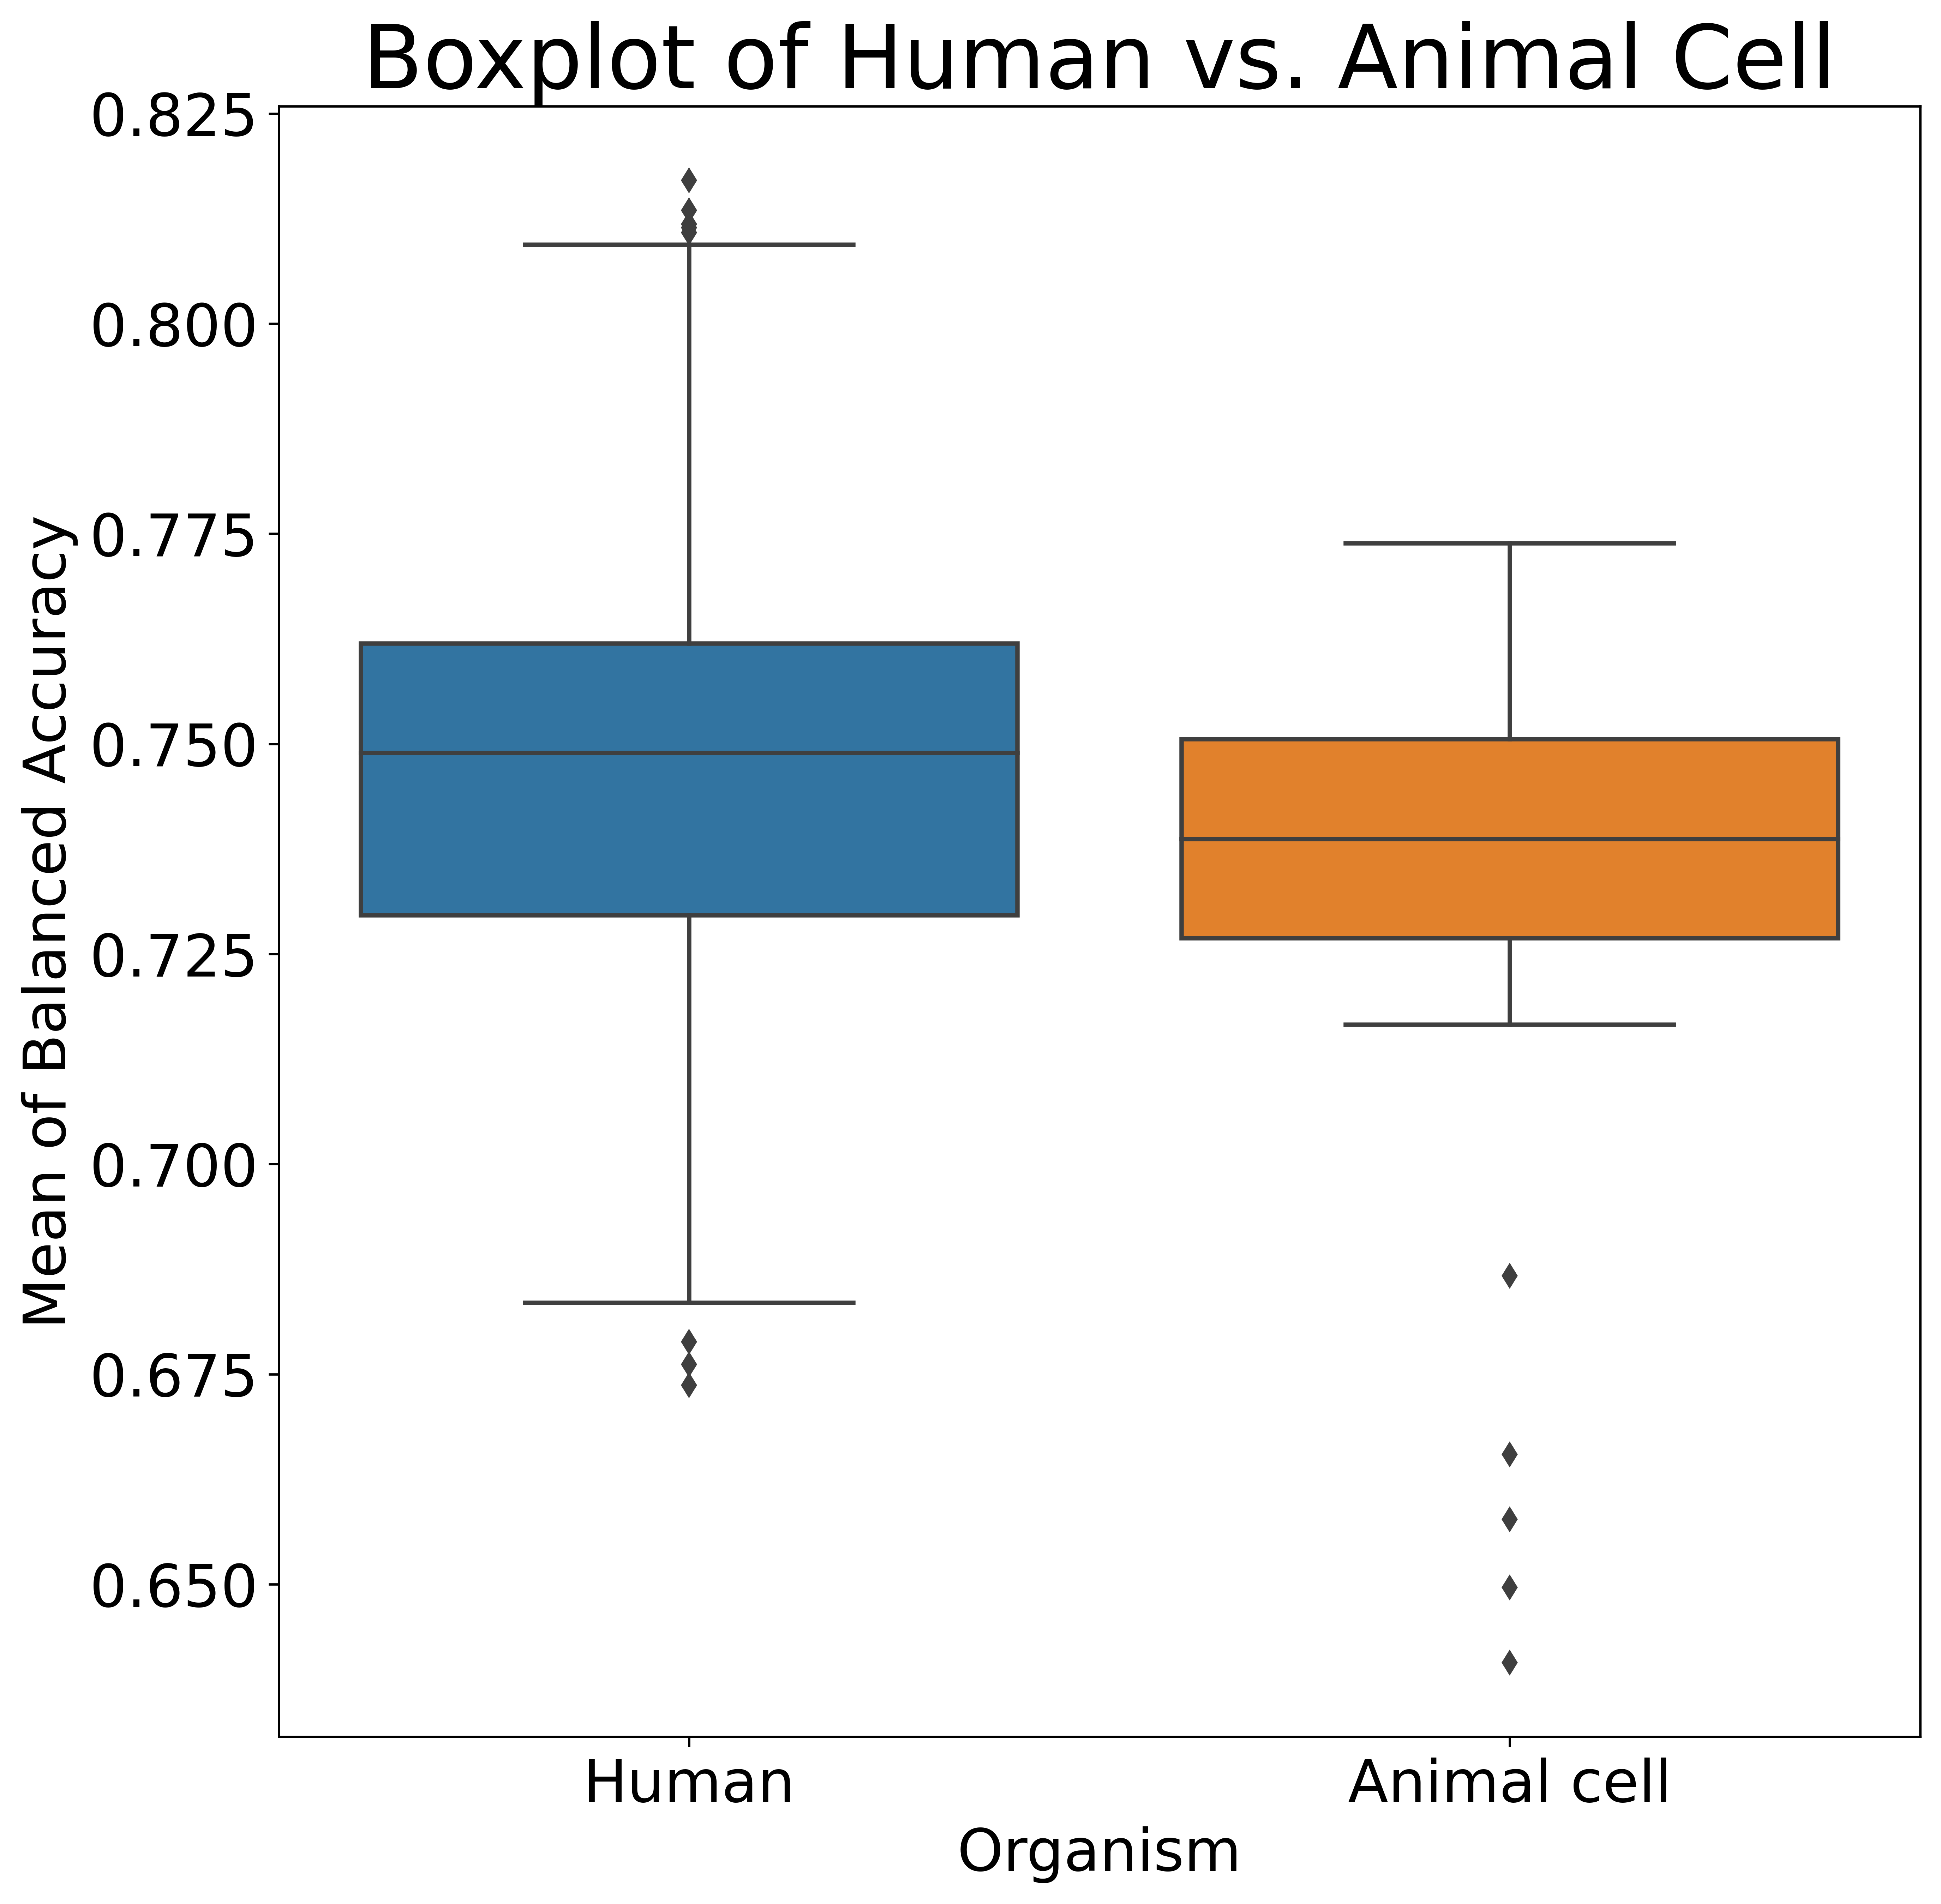

In [77]:
# box_df = assys_per.groupby('Organism').mean()
box_df = pd.melt(assys_per.reset_index(drop=True).set_index('Organism').T)
my_pal = {"Human": sns.color_palette()[0], "Animal cell": sns.color_palette()[1]}

fig= plt.figure(figsize=(10,10))
# ax = sns.boxplot(x="Organism", y="value", data=pd.melt(box_df.T), palette = my_pal)
ax = sns.boxplot(x="Organism", y="value", data=box_df, palette = my_pal)
ax.axes.set_title("Boxplot of Human vs. Animal Cell",fontsize=30)
ax.set_xlabel("Organism",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

In [103]:
from scipy import stats
t_test_df_org = box_df.groupby('Organism').mean()
stats.ttest_ind(t_test_df_org.values[0], 
                t_test_df_org.values[1])

/var/folders/q3/4xkzknpn01j0stqqmhhm0jpr0000gn/T/ipykernel_30565/3834415863.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(t_test_df_org.values[0],
/Users/wenyuzeng/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/wenyuzeng/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Ttest_indResult(statistic=nan, pvalue=nan)

## Organism Boxplot - detailed in Animal species

In [104]:
assay_info_per = assay_info.copy(deep=True)
assay_info_per.loc[assay_info_per['Cell_Line'] == 'DT40', 'Organism'] = 'Chicken'
assay_info_per.loc[assay_info_per['Cell_Line'] == 'NIH/3T3', 'Organism'] = 'Murine embryo fibroblast'
assay_info_per.loc[assay_info_per['Cell_Line'] == 'C3H10T1/2', 'Organism'] = 'Murine embryo fibroblast'
assay_info_per.loc[assay_info_per['Cell_Line'] == 'CHO', 'Organism'] = 'Hamster'
assay_info_per.loc[assay_info_per['Cell_Line'] == 'GH3', 'Organism'] = 'Rat pituitary'
assay_info_per.Organism.value_counts()
print(assay_info_per.columns)

Index(['Cell_Line', 'Tissue_Type4', 'Cell_Type', 'Gender', 'Organism',
       'Tissue_Type2', 'ProtocolName'],
      dtype='object')


In [108]:
assay_org_new = assay_info_per[['Organism', 'ProtocolName']]
assay_org_new = assay_org_new.rename(columns = {'ProtocolName': 'assay'})
assys_per_new = assys_per.merge(assay_org_new, on = 'assay')
assys_per_new

assay         0         1         2  \
0                         tox21-ahr-p1  0.752015  0.735115  0.747602   
1                 tox21-ap1-agonist-p1  0.702074  0.714258  0.718092   
2           tox21-ar-bla-antagonist-p1  0.700561  0.709375  0.701632   
3      tox21-ar-mda-kb2-luc-agonist-p3  0.757046  0.718890  0.721620   
4   tox21-ar-mda-kb2-luc-antagonist-p1  0.741278  0.755181  0.759861   
5   tox21-ar-mda-kb2-luc-antagonist-p2  0.779479  0.756368  0.779833   
6                     tox21-are-bla-p1  0.757489  0.751260  0.755544   
7                   tox21-aromatase-p1  0.737618  0.727042  0.736410   
8                 tox21-car-agonist-p1  0.747363  0.738933  0.753054   
9              tox21-car-antagonist-p1  0.739930  0.721583  0.721213   
10           tox21-elg1-luc-agonist-p1  0.762344  0.749208  0.751957   
11          tox21-er-bla-antagonist-p1  0.727352  0.755174  0.730657   
12     tox21-er-luc-bg1-4e2-agonist-p4  0.787110  0.784227  0.786525   
13  tox21-er-luc-bg1-4e2-antagonist-p1  0.762482  0.782431  0.766416   
14  tox21-er-luc-bg1-4e2-antagonist-p2  0.747005  0.775294  0.727373   
15         tox21-erb-bla-antagonist-p1  0.766206  0.743784  0.766581   
16                    tox21-erb-bla-p1  0.746953  0.747100  0.758430   
17                        tox21-err-p1  0.751676  0.780447  0.768457   
18                   tox21-esre-bla-p1  0.728841  0.754827  0.733296   
19            tox21-fxr-bla-agonist-p2  0.765569  0.761965  0.774747   
20         tox21-fxr-bla-antagonist-p1  0.732600  0.752831  0.743200   
21         tox21-gh3-tre-antagonist-p1  0.765787  0.769700  0.763055   
22     tox21-gr-hela-bla-antagonist-p1  0.751859  0.753270  0.780757   
23                   tox21-h2ax-cho-p2  0.752300  0.763445  0.769843   
24                       tox21-hdac-p1  0.810839  0.800456  0.784395   
25            tox21-hre-bla-agonist-p1  0.678828  0.690005  0.699719   
26                    tox21-hse-bla-p1  0.726190  0.743814  0.742355   
27                    tox21-mitotox-p1  0.750596  0.749556  0.713017   
28           tox21-nfkb-bla-agonist-p1  0.743421  0.769139  0.752193   
29                    tox21-p53-bla-p1  0.729819  0.743556  0.751458   
30                    tox21-pgc-err-p1  0.761937  0.759288  0.762722   
31          tox21-ppard-bla-agonist-p1  0.778183  0.762360  0.784185   
32       tox21-ppard-bla-antagonist-p1  0.748942  0.778700  0.760258   
33       tox21-pparg-bla-antagonist-p1  0.809419  0.817029  0.811402   
34             tox21-pr-bla-agonist-p1  0.741363  0.721009  0.742768   
35          tox21-pr-bla-antagonist-p1  0.676160  0.713030  0.700337   
36             tox21-rar-antagonist-p2  0.716582  0.724563  0.720488   
37         tox21-ror-cho-antagonist-p1  0.665433  0.657726  0.686681   
38            tox21-rxr-bla-agonist-p1  0.733895  0.737361  0.737134   
39            tox21-sbe-bla-agonist-p1  0.760760  0.710329  0.740514   
40         tox21-sbe-bla-antagonist-p1  0.715025  0.716555  0.684251   
41       tox21-shh-3t3-gli3-agonist-p1  0.753456  0.720273  0.747537   
42    tox21-shh-3t3-gli3-antagonist-p1  0.729606  0.736984  0.733884   
43            tox21-vdr-bla-agonist-p1  0.715031  0.714784  0.716814   
44         tox21-vdr-bla-antagonist-p1  0.745125  0.730731  0.755985   
45                   tox21-dt40-p1_653  0.736417  0.729002  0.743732   
46                   tox21-dt40-p1_100  0.746452  0.744735  0.743212   
47                   tox21-dt40-p1_657  0.738220  0.736642  0.751986   
48         tox21-rt-viability-hepg2-p1  0.746436  0.749629  0.759274   
49        tox21-rt-viability-hek293-p1  0.733974  0.721261  0.726874   

           3         4   Organism_x                Organism_y  
0   0.760323  0.751365        Human                     Human  
1   0.739258  0.745752        Human                     Human  
2   0.743201  0.705735        Human                     Human  
3   0.731949  0.750465        Human                     Human  
4   0.752917  0.716597        Human     

In [109]:
assys_per_new = assys_per_new.drop(columns=['assay','Organism_x'])
assys_per_new = assys_per_new.set_index('Organism_y')
assys_per_new

0         1         2         3         4
Organism_y                                                                
Human                     0.752015  0.735115  0.747602  0.760323  0.751365
Human                     0.702074  0.714258  0.718092  0.739258  0.745752
Human                     0.700561  0.709375  0.701632  0.743201  0.705735
Human                     0.757046  0.718890  0.721620  0.731949  0.750465
Human                     0.741278  0.755181  0.759861  0.752917  0.716597
Human                     0.779479  0.756368  0.779833  0.774440  0.759557
Human                     0.757489  0.751260  0.755544  0.779308  0.762170
Human                     0.737618  0.727042  0.736410  0.722507  0.729613
Human                     0.747363  0.738933  0.753054  0.752098  0.746658
Human                     0.739930  0.721583  0.721213  0.738668  0.712979
Human                     0.762344  0.749208  0.751957  0.775698  0.755747
Human                     0.727352  0.755174  0.730657  0.710010  0.739861
Human                     0.787110  0.784227  0.786525  0.793240  0.785033
Human                     0.762482  0.782431  0.766416  0.752368  0.744292
Human                     0.747005  0.775294  0.727373  0.778264  0.763365
Human                     0.766206  0.743784  0.766581  0.762350  0.747716
Human                     0.746953  0.747100  0.758430  0.771929  0.758479
Human                     0.751676  0.780447  0.768457  0.770376  0.763344
Human                     0.728841  0.754827  0.733296  0.712284  0.770068
Human                     0.765569  0.761965  0.774747  0.778004  0.794479
Human                     0.732600  0.752831  0.743200  0.769214  0.741296
Rat pituitary             0.765787  0.769700  0.763055  0.768274  0.773859
Human                     0.751859  0.753270  0.780757  0.743604  0.766910
Hamster                   0.752300  0.763445  0.769843  0.772556  0.742706
Human                     0.810839  0.800456  0.784395  0.724217  0.696436
Human                     0.678828  0.690005  0.699719  0.673663  0.708121
Human                     0.726190  0.743814  0.742355  0.737570  0.749942
Human                     0.750596  0.749556  0.713017  0.706301  0.754287
Human                     0.743421  0.769139  0.752193  0.758573  0.732257
Human                     0.729819  0.743556  0.751458  0.757992  0.756613
Human                     0.761937  0.759288  0.762722  0.759746  0.736002
Human                     0.778183  0.762360  0.784185  0.774847  0.767819
Human                     0.748942  0.778700  0.760258  0.756264  0.759278
Human                     0.809419  0.817029  0.811402  0.813461  0.811829
Human                     0.741363  0.721009  0.742768  0.717577  0.761191
Human                     0.676160  0.713030  0.700337  0.723901  0.707186
Murine embryo fibroblast  0.716582  0.724563  0.720488  0.726899  0.722451
Hamster                   0.665433  0.657726  0.686681  0.640662  0.649639
Human                     0.733895  0.737361  0.737134  0.733112  0.721883
Human                     0.760760  0.710329  0.740514  0.760243  0.743090
Human                     0.715025  0.716555  0.684251  0.684740  0.683492
Murine embryo fibroblast  0.753456  0.720273  0.747537  0.750585  0.748281
Murine embryo fibroblast  0.729606  0.736984  0.733884  0.729920  0.729390
Human                     0.715031  0.714784  0.716814  0.713741  0.712347
Human                     0.745125  0.730731  0.755985  0.741474  0.750396
Chicken                   0.736417  0.729002  0.743732  0.744776  0.726404
Chicken                   0.746452  0.744735  0.743212  0.736586  0.740674
Chicken                   0.738220  0.736642  0.751986  0.744784  0.738699
Human                     0.746436  0.749629  0.759274  0.778436  0.759035
Human                     0.733974  0.721261  0.726874  0.730216  0.738100

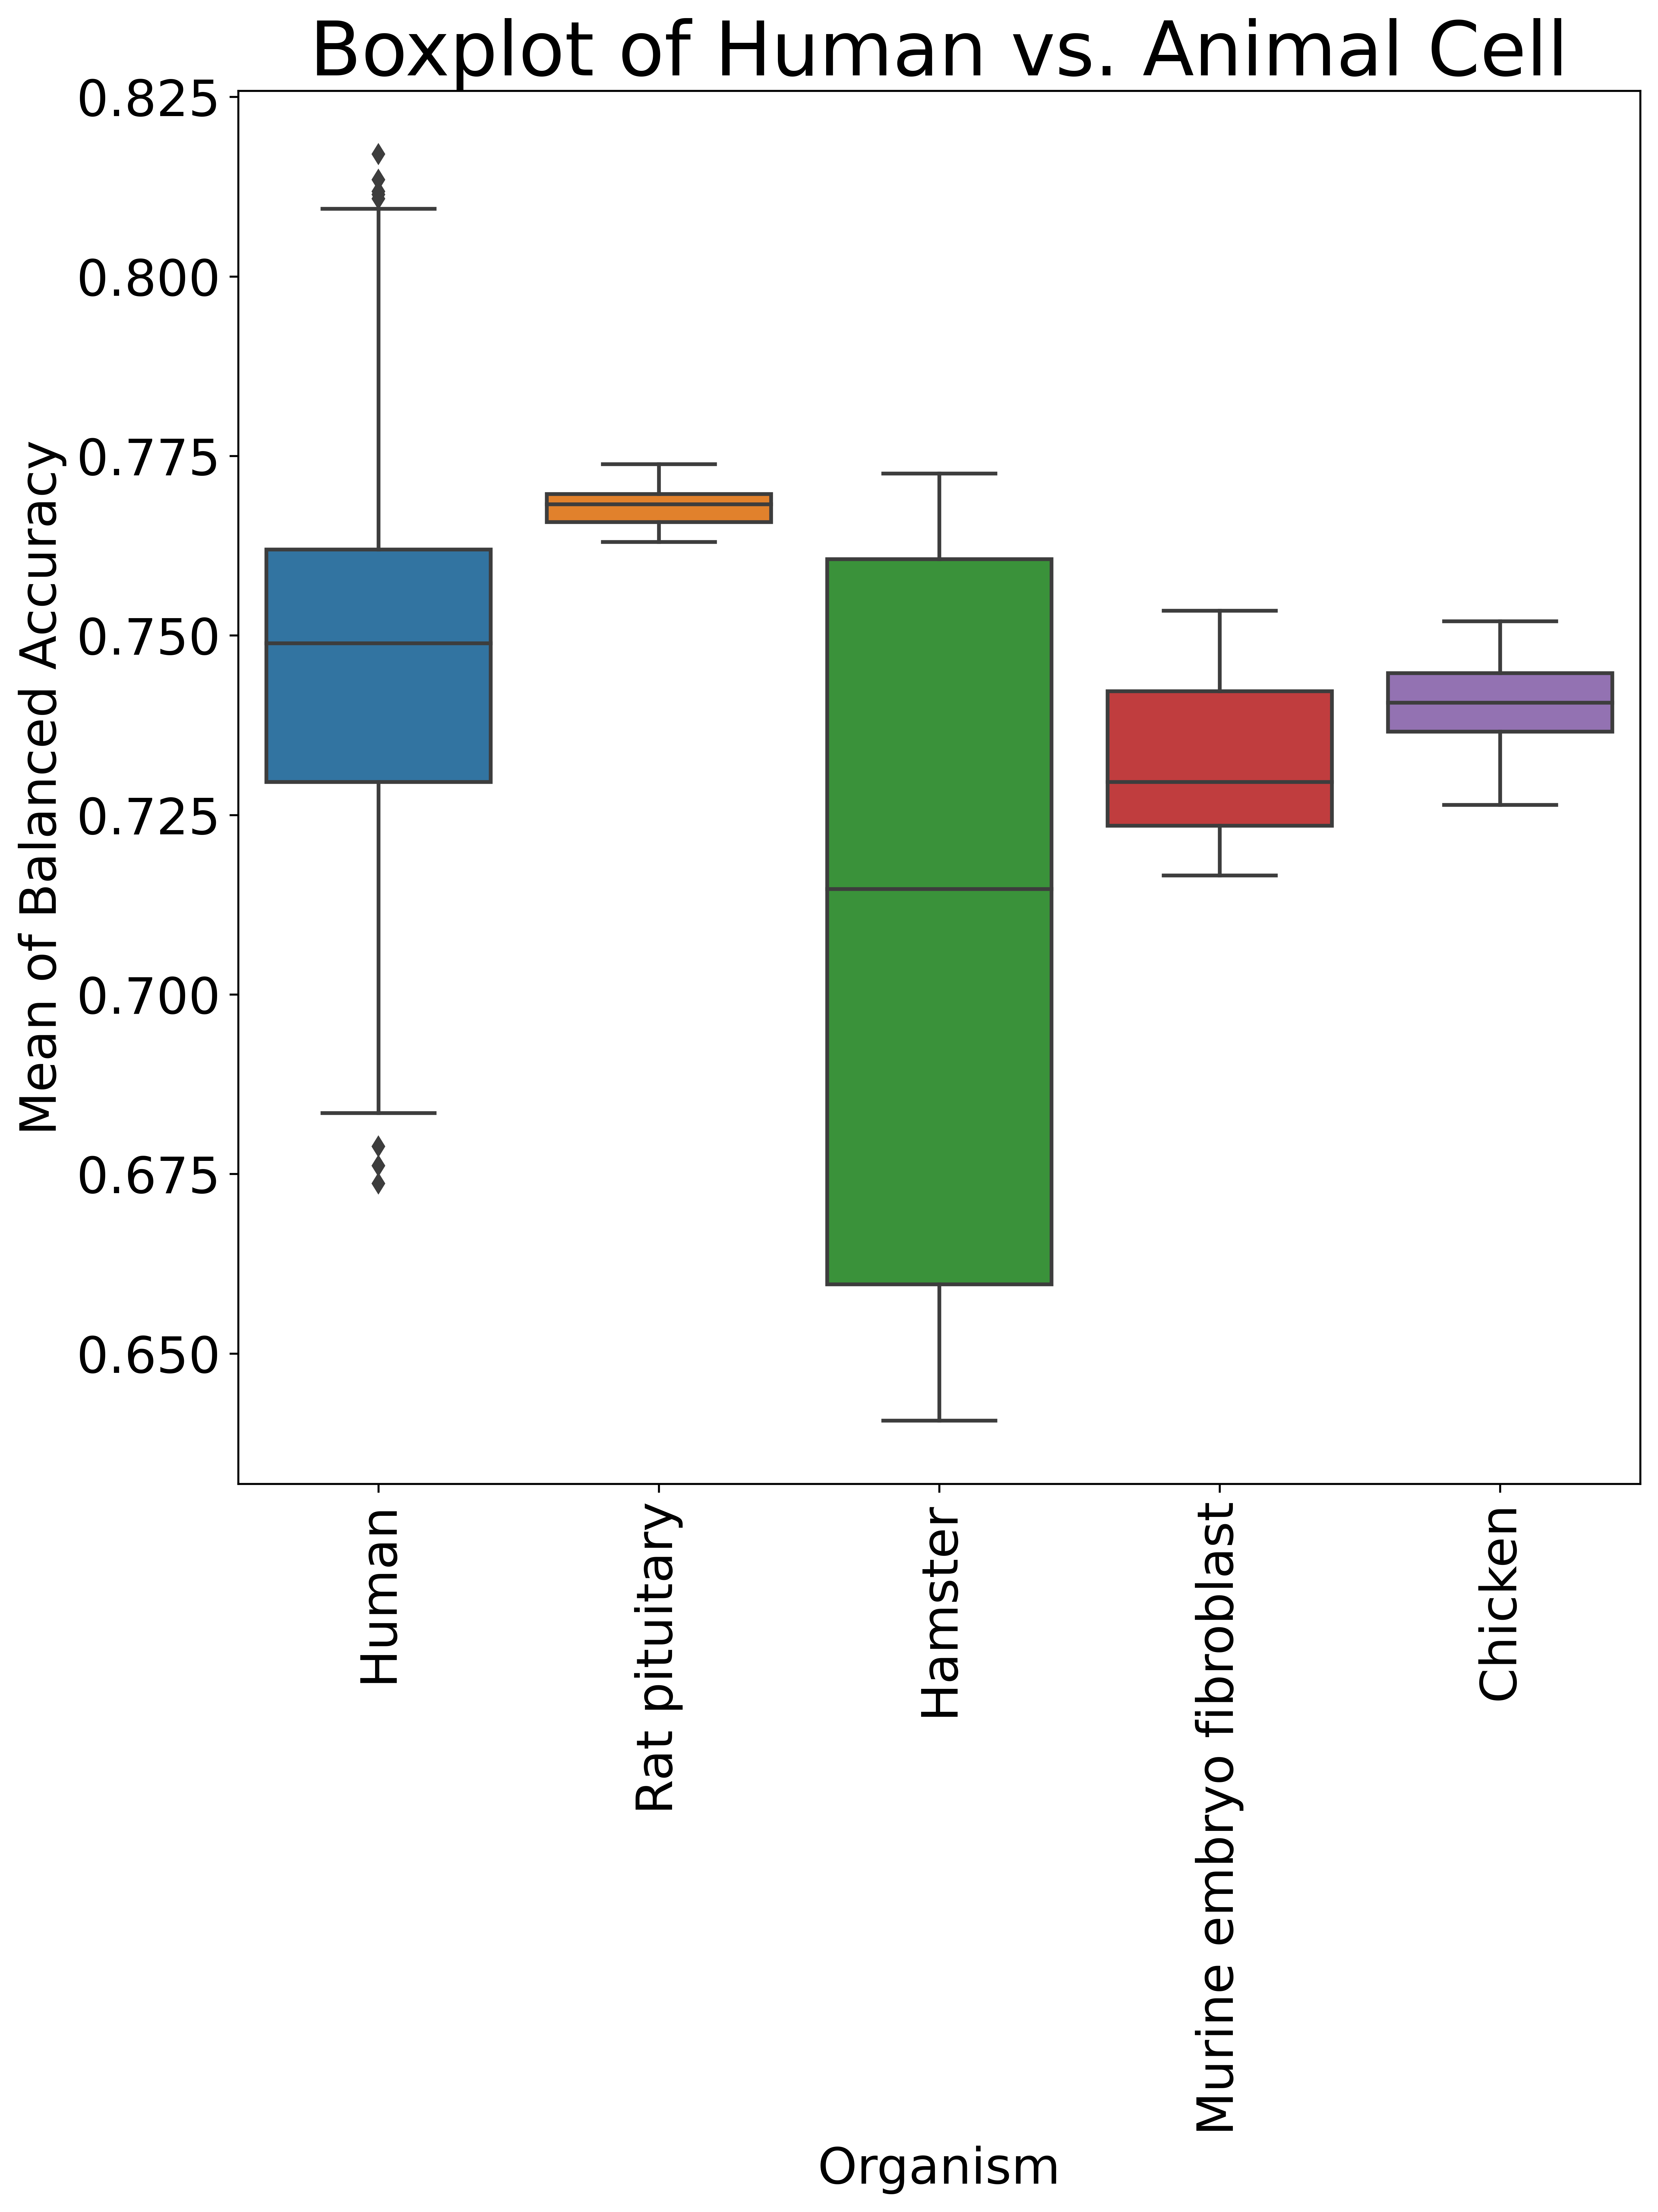

In [115]:
box_df_new = pd.melt(assys_per_new.T)
# my_pal = {"Human": sns.color_palette()[0], "Animal cell": sns.color_palette()[1]}

fig= plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Organism_y", y="value", data=box_df_new)
ax.axes.set_title("Boxplot of Human vs. Animal Cell",fontsize=30)
ax.set_xlabel("Organism",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=20)
plt.show()

## Sex Boxplot

In [121]:
assay_info = assay_info.rename(columns = {'ProtocolName': 'assay', 'Tissue_Type2': 'Tissue_Type',
                                         'Tissue_Type4': 'Tumor_Type', 'Gender': 'Sex'})
assay_info

Cell_Line  Tumor_Type                           Cell_Type Sex  \
0   MDA-MB-453  Metastatic                          epithelial   F   
1   MDA-MB-453  Metastatic                          epithelial   F   
2   MDA-MB-453  Metastatic                          epithelial   F   
3        MCF-7     Primary                          epithelial   F   
4         DT40     Primary                         lymphoblast   F   
5         DT40     Primary                         lymphoblast   F   
6         DT40     Primary                         lymphoblast   F   
7      NIH/3T3      Normal                          fibroblast   M   
8      NIH/3T3      Normal                          fibroblast   M   
9    C3H10T1/2      Normal                          fibroblast   F   
10      HEK293      Normal                          epithelial   F   
11      HEK293      Normal                          epithelial   F   
12      HEK293      Normal                          epithelial   F   
13      HEK293      Normal                          epithelial   F   
14      HEK293      Normal                          epithelial   F   
15      HEK293      Normal                          epithelial   F   
16      HEK293      Normal                          epithelial   F   
17      HEK293      Normal                          epithelial   F   
18      HEK293      Normal                          epithelial   F   
19      HEK293      Normal                          epithelial   F   
20      HEK293      Normal                          epithelial   F   
21      HEK293      Normal                          epithelial   F   
22      HEK293      Normal                          epithelial   F   
23      HEK293      Normal                          epithelial   F   
24      HEK293      Normal                          epithelial   F   
25      HEK293      Normal                          epithelial   F   
26      HEK293      Normal                          epithelial   F   
27      HEK293      Normal                          epithelial   F   
28      HEK293      Normal                          epithelial   F   
29      HEK293      Normal                          epithelial   F   
30     HCT-116     Primary                          epithelial   M   
31     HCT-116     Primary                          epithelial   M   
32       HepG2     Primary                     epithelial-like   M   
33       HepG2     Primary                     epithelial-like   M   
34       HepG2     Primary                     epithelial-like   M   
35       HepG2     Primary                     epithelial-like   M   
36       HepG2     Primary                     epithelial-like   M   
37       HepG2     Primary                     epithelial-like   M   
38         CHO      Normal  lymphoblast-like, epithelial-like    F   
39         CHO      Normal  lymphoblast-like, epithelial-like    F   
40         BG1     Primary                          epithelial   F   
41         BG1     Primary                          epithelial   F   
42         BG1     Primary                          epithelial   F   
43         GH3     Primary                          epithelial   F   
44        HeLa     Primary                          epithelial   F   
45        HeLa     Primary                          epithelial   F   
46        HeLa     Primary                          epithelial   F   
47      ME-180  Metastatic                          epithelial   F   
48      ME-180  Metastatic                          epithelial   F   
49      ME-180  Metastatic                          epithelial   F   

       Organism           Tissue_Type                               assay  
0         Human  pericardial effusion     tox21-ar-mda-kb2-luc-agonist-p3  
1         Human  pericardial effusion  tox21-ar-mda-kb2-luc-antagonist-p1  
2         Human  pericardial effusion  tox21-ar-mda-kb2-luc-antagonist-p2  
3         Human         mammary gland                  tox21-aromatase-p1  
4   Animal cell                 bursa                 

In [119]:
assys_per = assys_per.drop(columns='Organism')

In [123]:
assay_sex = assay_info[['Sex', 'assay']]
assys_sex = assys_per.merge(assay_sex, on = 'assay')
assys_sex = assys_sex.drop(columns='assay').set_index('Sex')

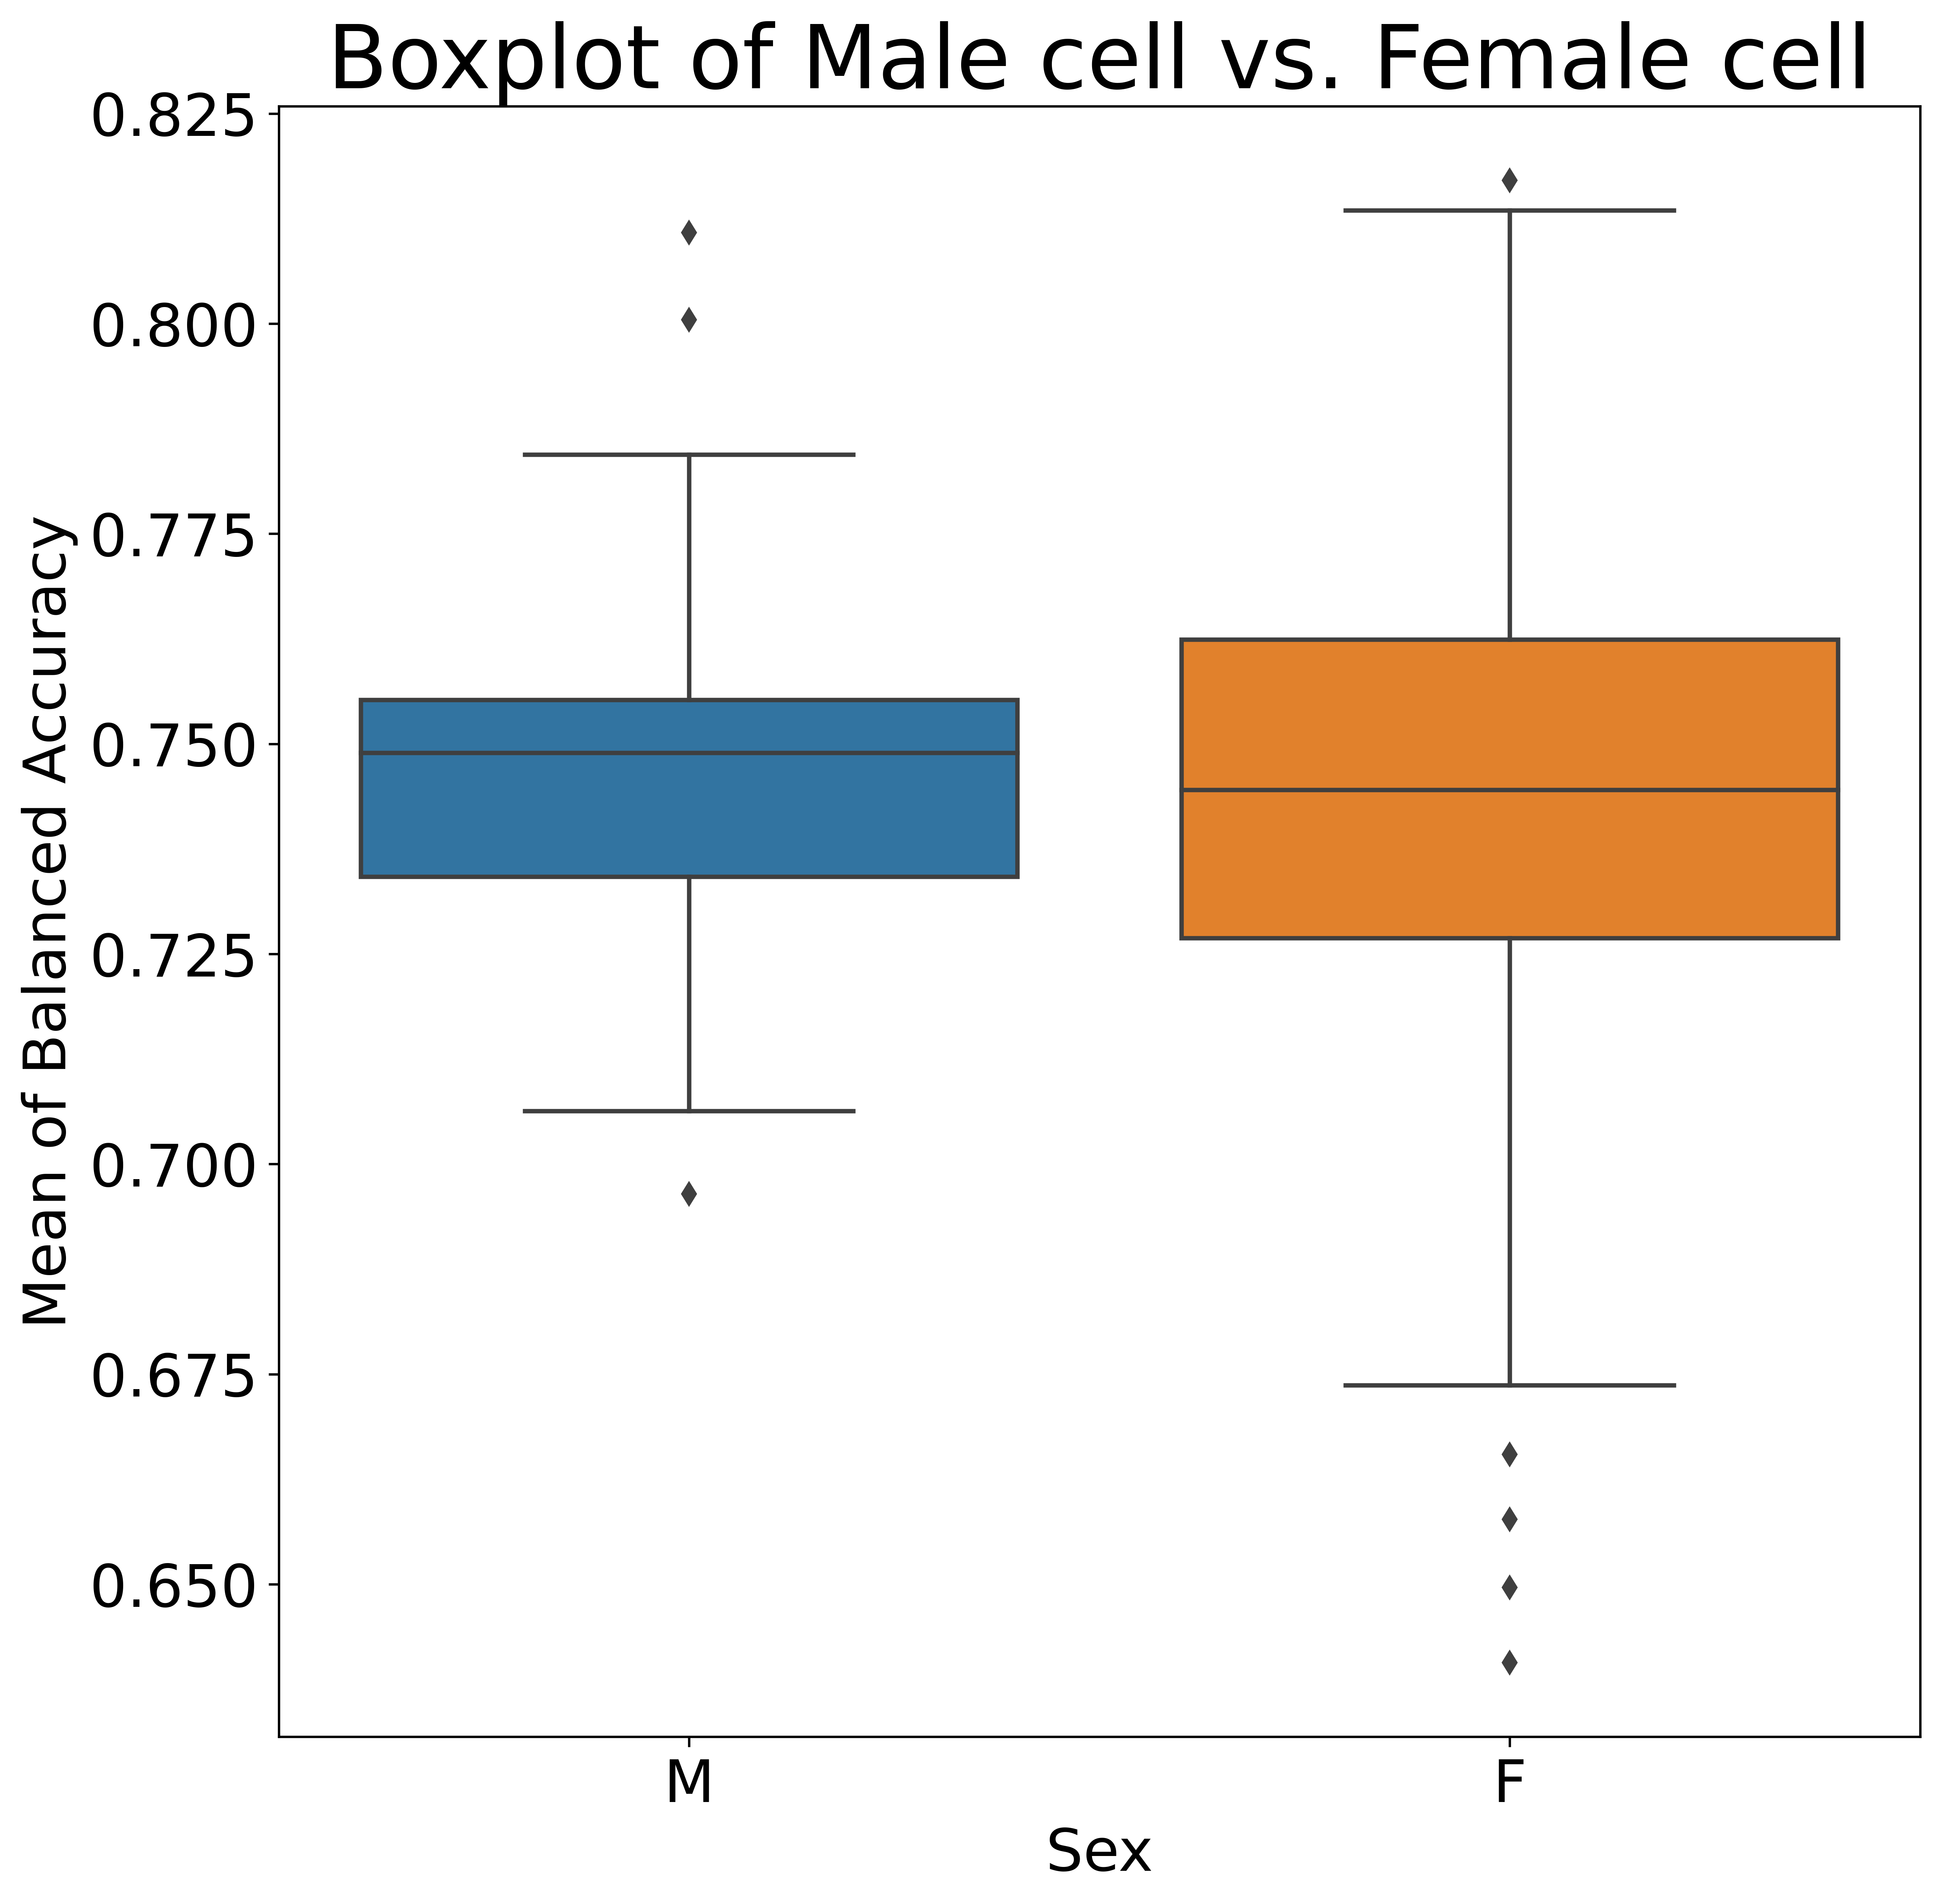

In [126]:
box_df_new = pd.melt(assys_sex.T)

fig= plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Sex", y="value", data=box_df_new)
ax.axes.set_title("Boxplot of Male cell vs. Female cell",fontsize=30)
ax.set_xlabel("Sex",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=20)
plt.show()

## Tissue Boxplot

In [128]:
assay_tissue = assay_info[['Tissue_Type', 'assay']]
assay_tissue = assys_per.merge(assay_tissue, on = 'assay')
assay_tissue = assay_tissue.drop(columns='assay').set_index('Tissue_Type')

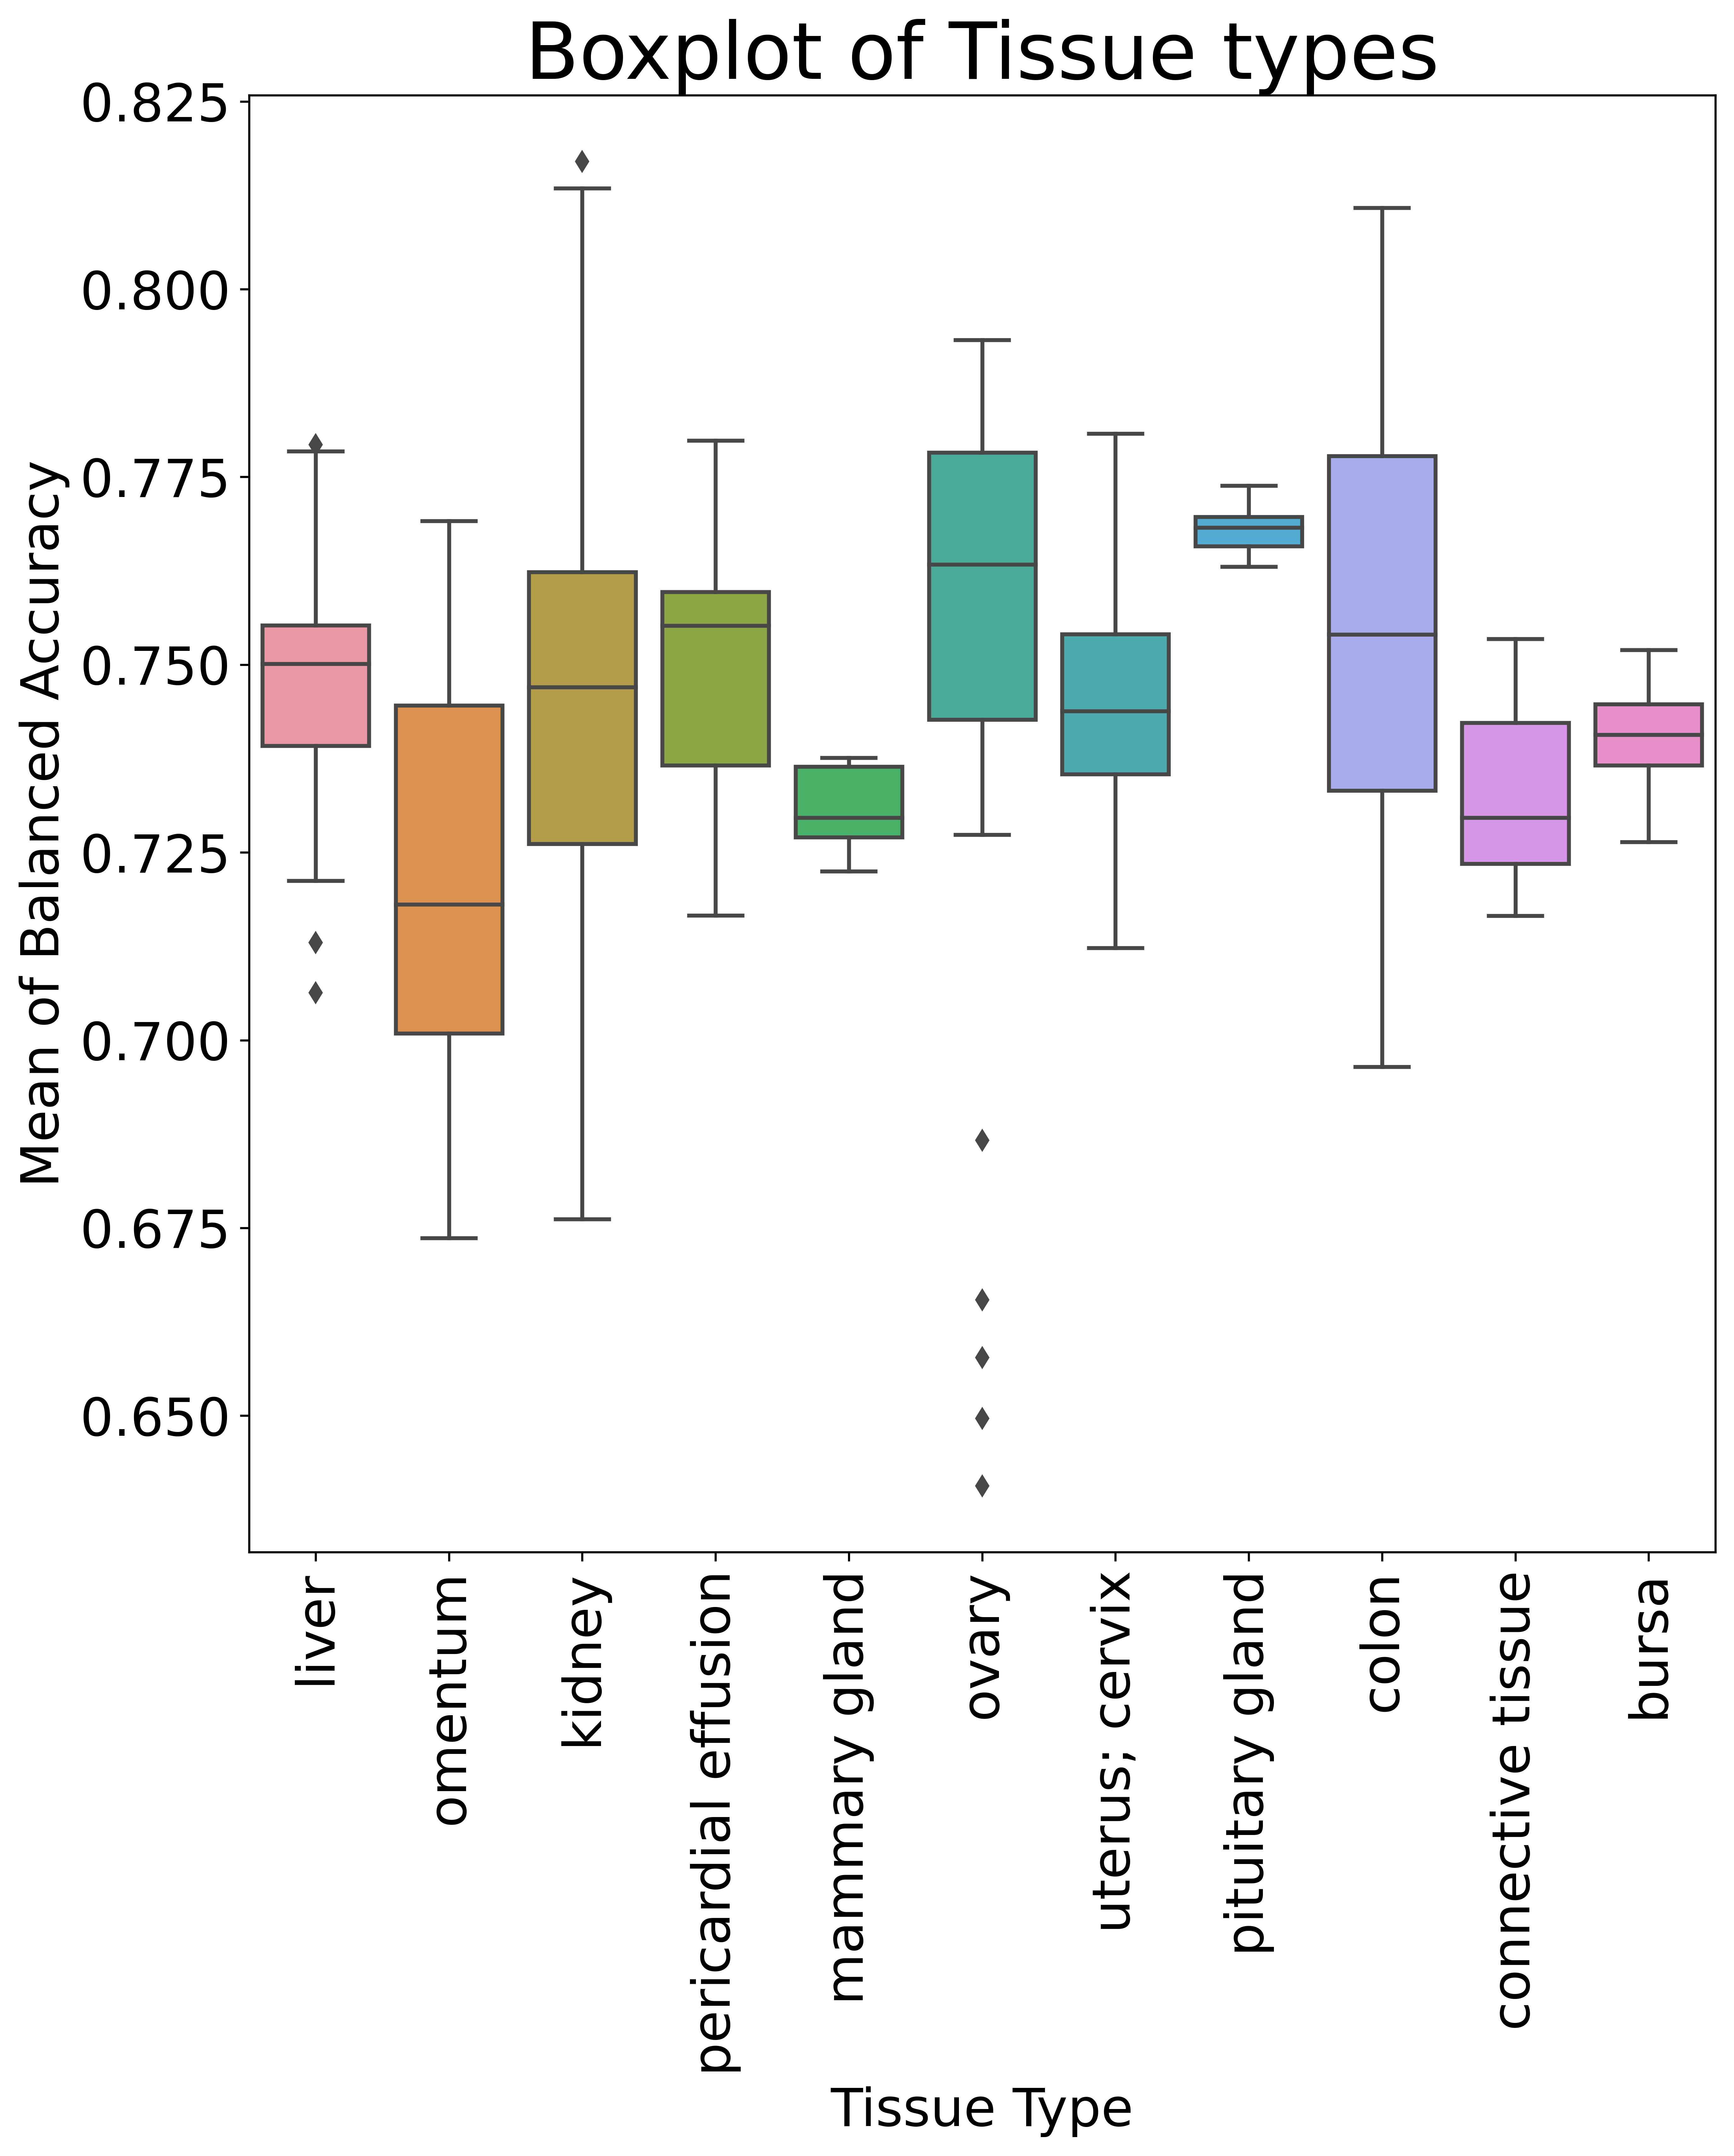

In [129]:
box_df_new = pd.melt(assay_tissue.T)

fig= plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Tissue_Type", y="value", data=box_df_new)
ax.axes.set_title("Boxplot of Tissue types",fontsize=30)
ax.set_xlabel("Tissue Type",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=20)
plt.show()

## Tumor Type Boxplot

In [130]:
assay_tumor = assay_info[['Tumor_Type', 'assay']]
assay_tumor = assys_per.merge(assay_tumor, on = 'assay')
assay_tumor = assay_tumor.drop(columns='assay').set_index('Tumor_Type')

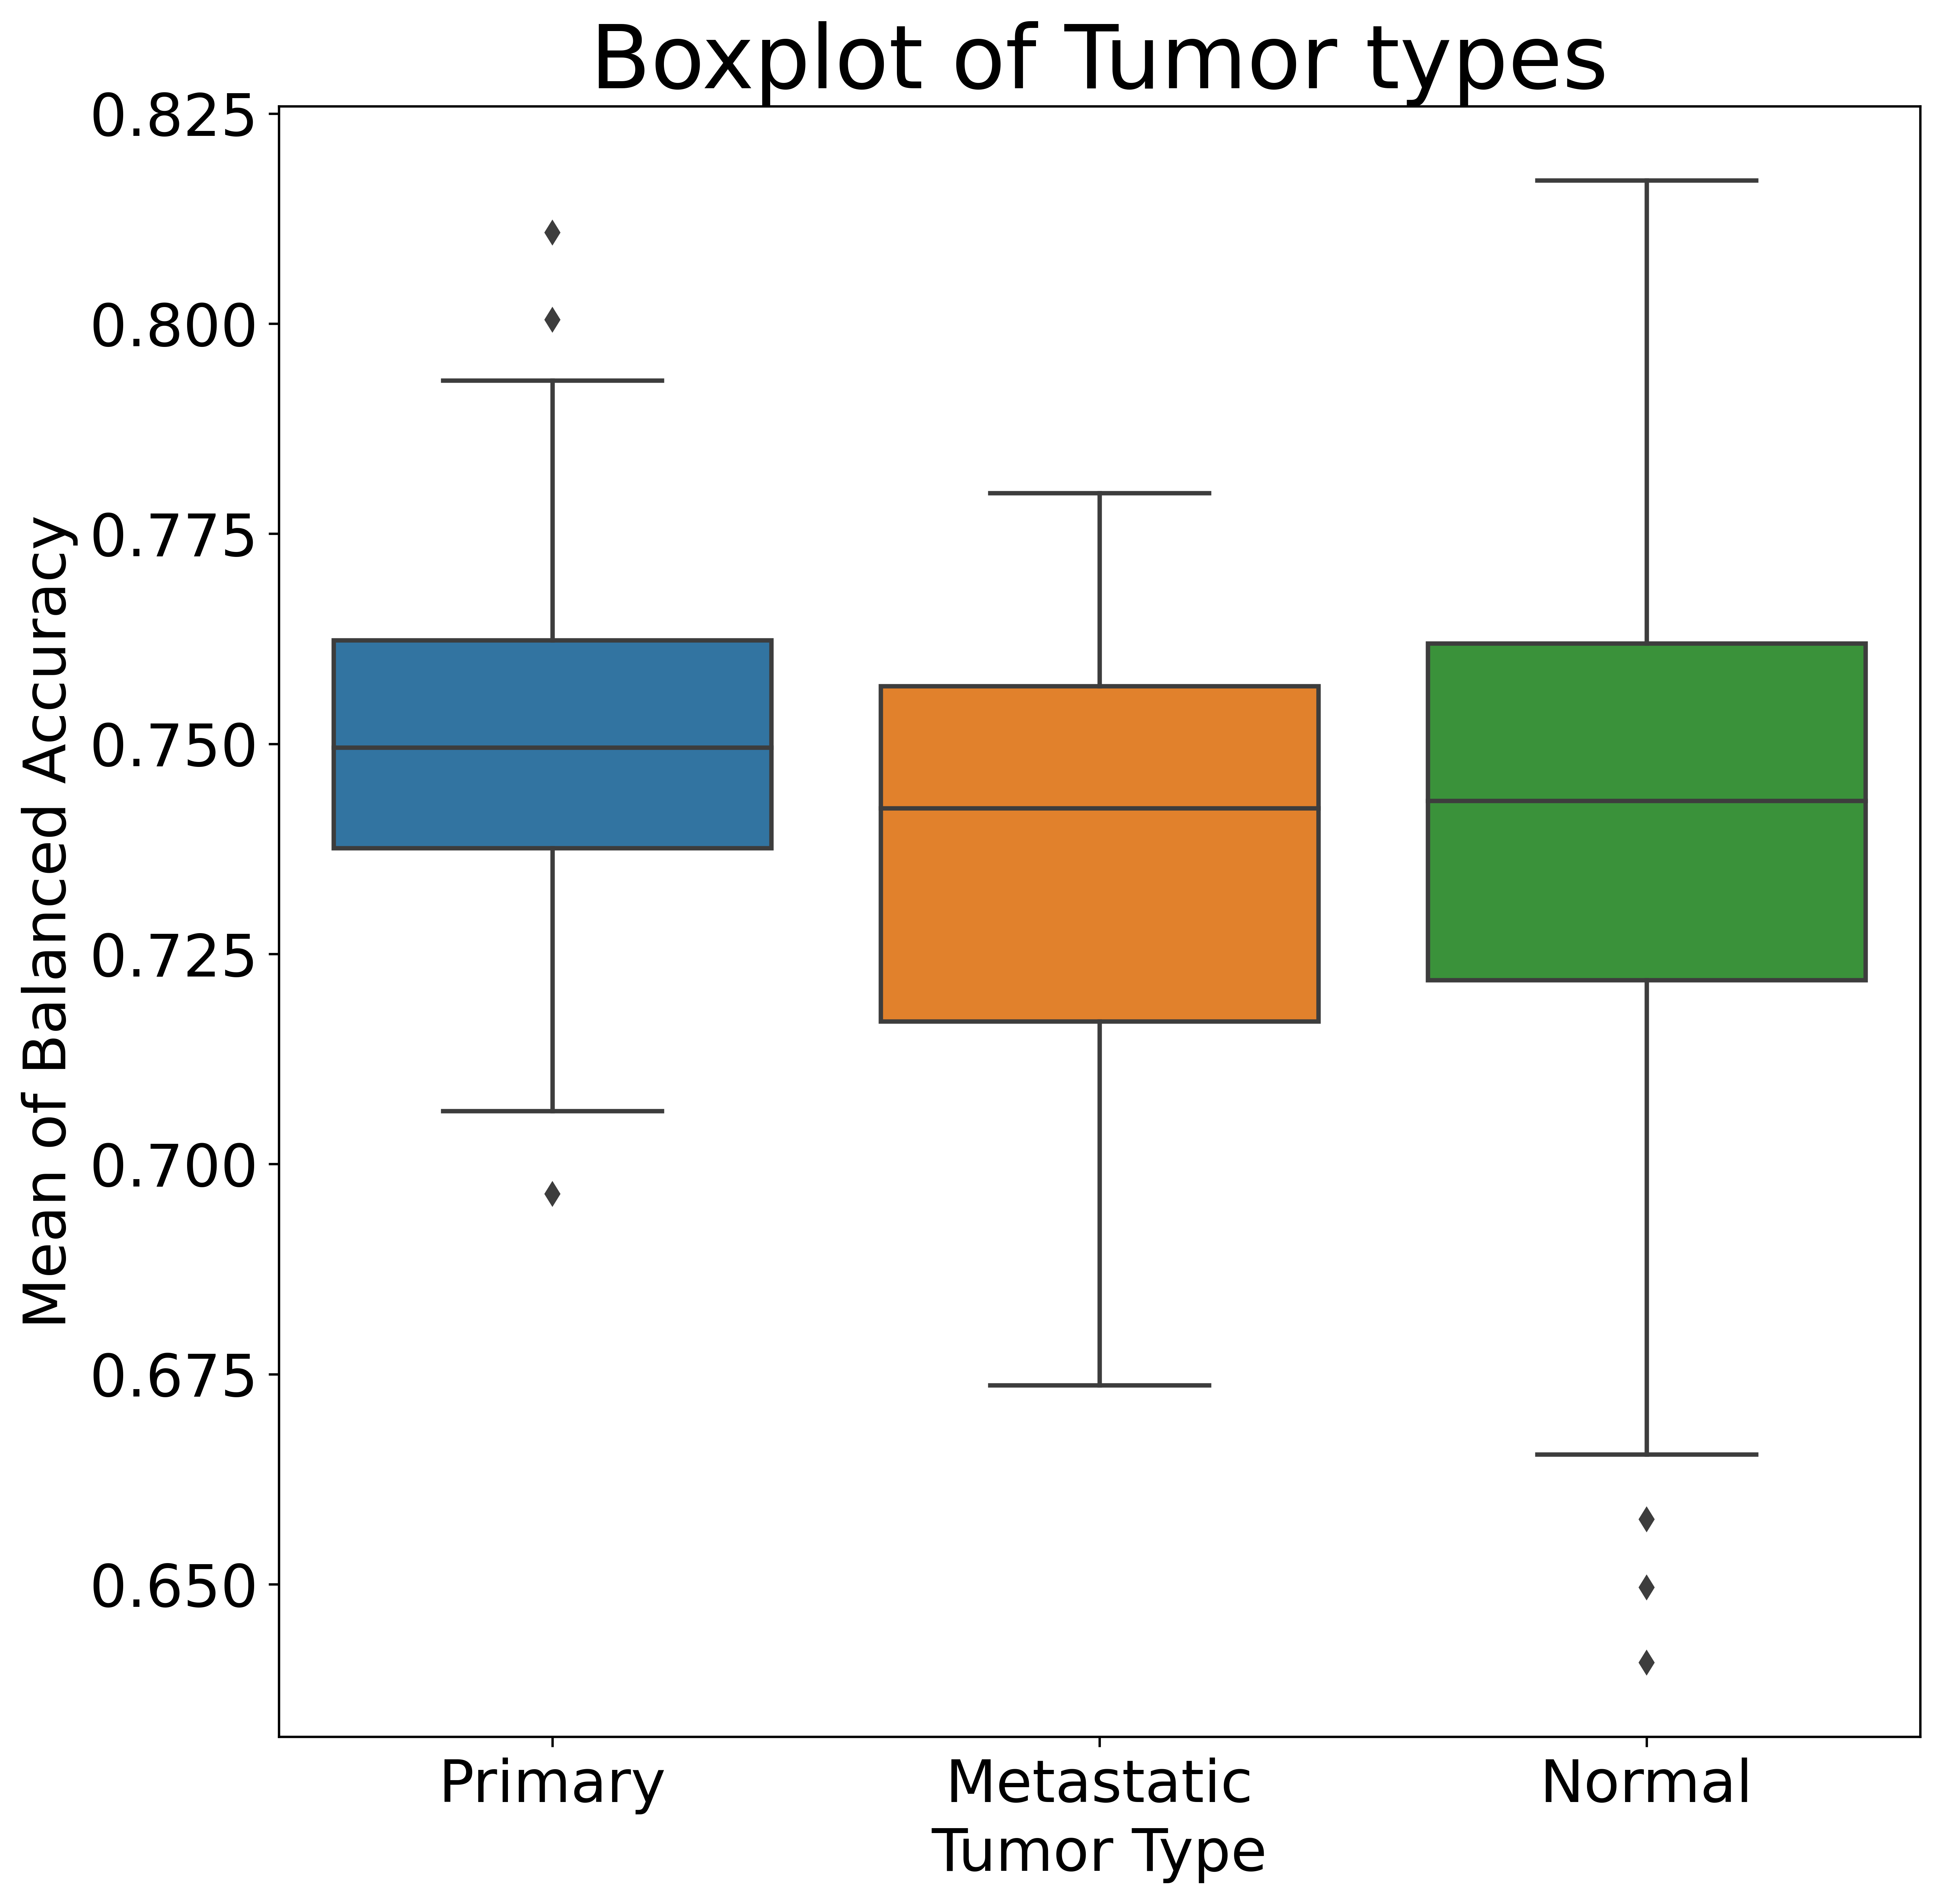

In [163]:
box_df_new = pd.melt(assay_tumor.T)

fig= plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Tumor_Type", y="value", data=box_df_new)
ax.axes.set_title("Boxplot of Tumor types",fontsize=30)
ax.set_xlabel("Tumor Type",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelsize=20)
plt.show()

## Cell Type

In [134]:
assay_cell = assay_info[['Cell_Type', 'assay']]
assay_cell = assys_per.merge(assay_cell, on = 'assay')
assay_cell = assay_cell.drop(columns='assay').set_index('Cell_Type')

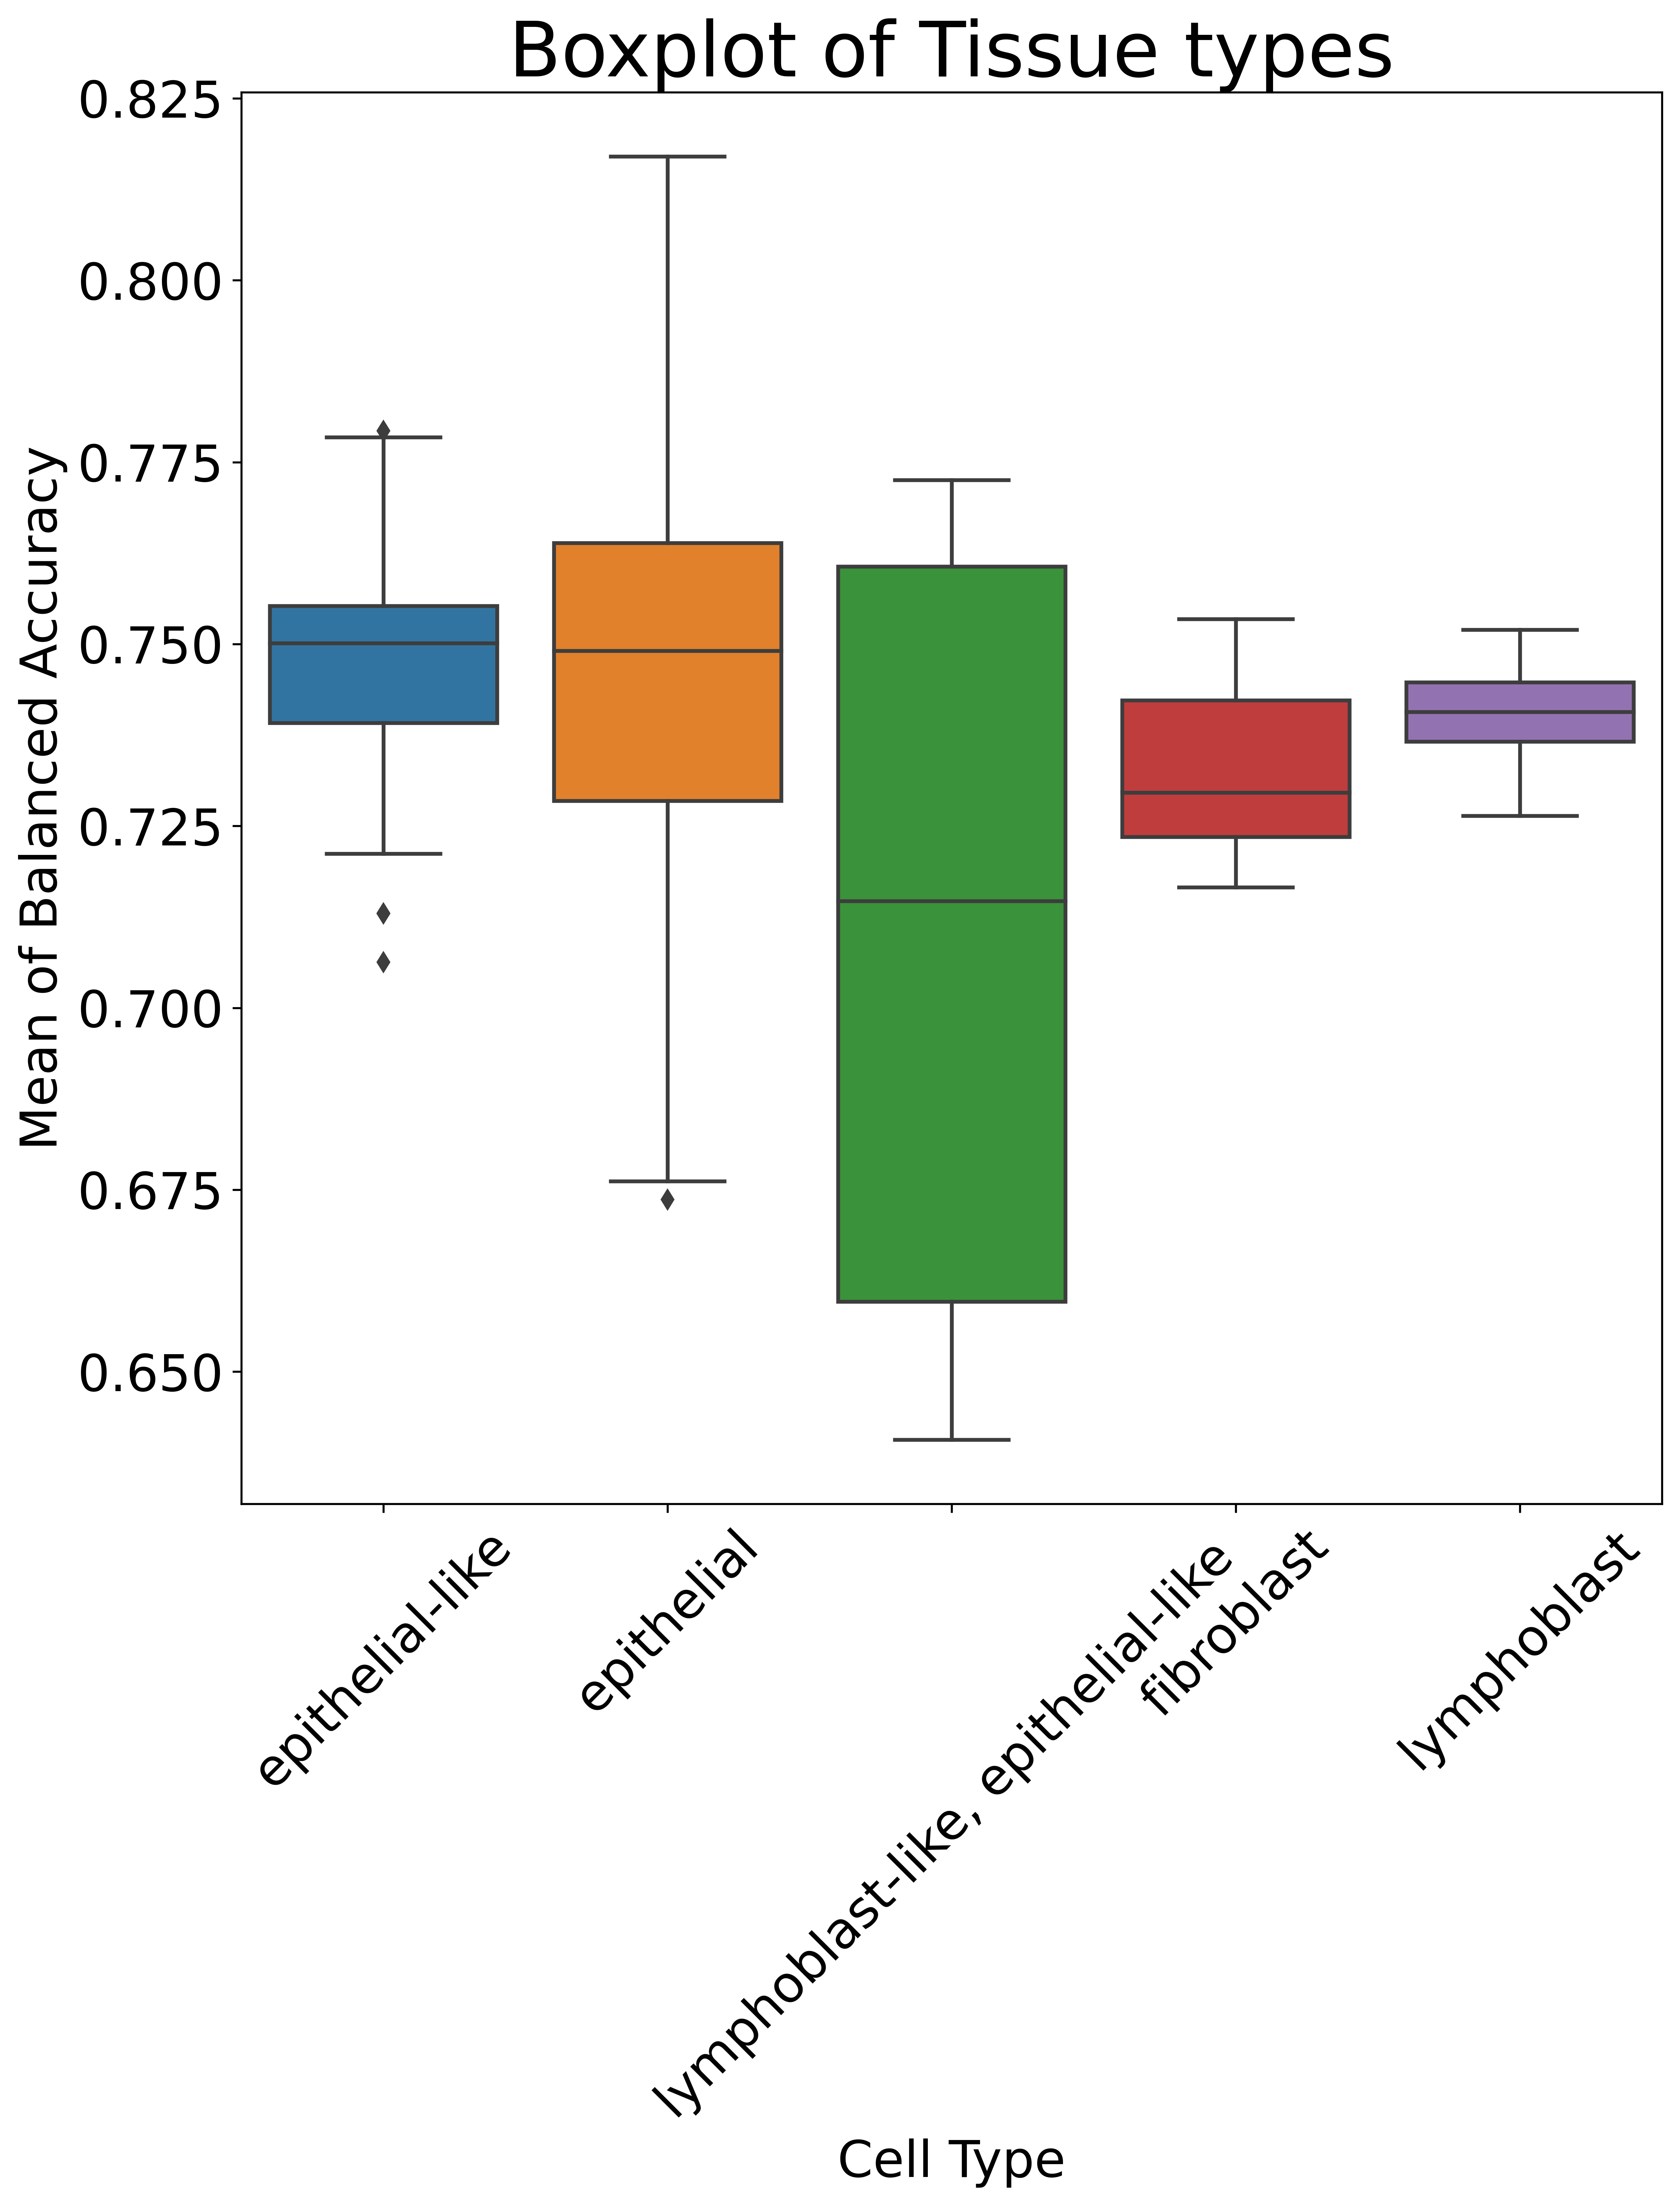

In [137]:
box_df_new = pd.melt(assay_cell.T)

fig= plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Cell_Type", y="value", data=box_df_new)
ax.axes.set_title("Boxplot of Tissue types",fontsize=30)
ax.set_xlabel("Cell Type",fontsize=20)
ax.set_ylabel("Mean of Balanced Accuracy",fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(labelsize=20)
plt.show()

In [138]:
full_df = assys_per.merge(assay_info, on = 'assay')
full_df

assay         0         1         2  \
0                         tox21-ahr-p1  0.752015  0.735115  0.747602   
1                 tox21-ap1-agonist-p1  0.702074  0.714258  0.718092   
2           tox21-ar-bla-antagonist-p1  0.700561  0.709375  0.701632   
3      tox21-ar-mda-kb2-luc-agonist-p3  0.757046  0.718890  0.721620   
4   tox21-ar-mda-kb2-luc-antagonist-p1  0.741278  0.755181  0.759861   
5   tox21-ar-mda-kb2-luc-antagonist-p2  0.779479  0.756368  0.779833   
6                     tox21-are-bla-p1  0.757489  0.751260  0.755544   
7                   tox21-aromatase-p1  0.737618  0.727042  0.736410   
8                 tox21-car-agonist-p1  0.747363  0.738933  0.753054   
9              tox21-car-antagonist-p1  0.739930  0.721583  0.721213   
10           tox21-elg1-luc-agonist-p1  0.762344  0.749208  0.751957   
11          tox21-er-bla-antagonist-p1  0.727352  0.755174  0.730657   
12     tox21-er-luc-bg1-4e2-agonist-p4  0.787110  0.784227  0.786525   
13  tox21-er-luc-bg1-4e2-antagonist-p1  0.762482  0.782431  0.766416   
14  tox21-er-luc-bg1-4e2-antagonist-p2  0.747005  0.775294  0.727373   
15         tox21-erb-bla-antagonist-p1  0.766206  0.743784  0.766581   
16                    tox21-erb-bla-p1  0.746953  0.747100  0.758430   
17                        tox21-err-p1  0.751676  0.780447  0.768457   
18                   tox21-esre-bla-p1  0.728841  0.754827  0.733296   
19            tox21-fxr-bla-agonist-p2  0.765569  0.761965  0.774747   
20         tox21-fxr-bla-antagonist-p1  0.732600  0.752831  0.743200   
21         tox21-gh3-tre-antagonist-p1  0.765787  0.769700  0.763055   
22     tox21-gr-hela-bla-antagonist-p1  0.751859  0.753270  0.780757   
23                   tox21-h2ax-cho-p2  0.752300  0.763445  0.769843   
24                       tox21-hdac-p1  0.810839  0.800456  0.784395   
25            tox21-hre-bla-agonist-p1  0.678828  0.690005  0.699719   
26                    tox21-hse-bla-p1  0.726190  0.743814  0.742355   
27                    tox21-mitotox-p1  0.750596  0.749556  0.713017   
28           tox21-nfkb-bla-agonist-p1  0.743421  0.769139  0.752193   
29                    tox21-p53-bla-p1  0.729819  0.743556  0.751458   
30                    tox21-pgc-err-p1  0.761937  0.759288  0.762722   
31          tox21-ppard-bla-agonist-p1  0.778183  0.762360  0.784185   
32       tox21-ppard-bla-antagonist-p1  0.748942  0.778700  0.760258   
33       tox21-pparg-bla-antagonist-p1  0.809419  0.817029  0.811402   
34             tox21-pr-bla-agonist-p1  0.741363  0.721009  0.742768   
35          tox21-pr-bla-antagonist-p1  0.676160  0.713030  0.700337   
36             tox21-rar-antagonist-p2  0.716582  0.724563  0.720488   
37         tox21-ror-cho-antagonist-p1  0.665433  0.657726  0.686681   
38            tox21-rxr-bla-agonist-p1  0.733895  0.737361  0.737134   
39            tox21-sbe-bla-agonist-p1  0.760760  0.710329  0.740514   
40         tox21-sbe-bla-antagonist-p1  0.715025  0.716555  0.684251   
41       tox21-shh-3t3-gli3-agonist-p1  0.753456  0.720273  0.747537   
42    tox21-shh-3t3-gli3-antagonist-p1  0.729606  0.736984  0.733884   
43            tox21-vdr-bla-agonist-p1  0.715031  0.714784  0.716814   
44         tox21-vdr-bla-antagonist-p1  0.745125  0.730731  0.755985   
45                   tox21-dt40-p1_653  0.736417  0.729002  0.743732   
46                   tox21-dt40-p1_100  0.746452  0.744735  0.743212   
47                   tox21-dt40-p1_657  0.738220  0.736642  0.751986   
48         tox21-rt-viability-hepg2-p1  0.746436  0.749629  0.759274   
49        tox21-rt-viability-hek293-p1  0.733974  0.721261  0.726874   

           3         4   Cell_Line  Tumor_Type  \
0   0.760323  0.751365       HepG2     Primary   
1   0.739258  0.745752      ME-180  Metastatic   
2   0.743201  0.705735      HEK293      Normal   
3   0.731949  0.750465  MDA-MB-453  Metastatic   
4   0.752917  0.716597  MDA-MB-453  Metastatic   
5   0.774440  0.759557  MDA-MB-453  Metastatic   
6   0.7793

In [139]:
# assys_per = pd.read_csv('assay_performance_new.csv')
# assys_per = assys_per.rename(columns = {'Assay_name': "assay"})
new_per_df = pd.merge(assys_compund, assys_per, on="assay")
new_per_df

assay  number_of_compound  number_of_active  \
0                         tox21-ahr-p1                7674               615   
1                 tox21-ap1-agonist-p1                7394               393   
2           tox21-ar-bla-antagonist-p1                7568               743   
3      tox21-ar-mda-kb2-luc-agonist-p3                7379               830   
4   tox21-ar-mda-kb2-luc-antagonist-p1                7823               637   
5   tox21-ar-mda-kb2-luc-antagonist-p2                7554               554   
6                     tox21-are-bla-p1                6958               548   
7                   tox21-aromatase-p1                7614               884   
8                 tox21-car-agonist-p1                7389               684   
9              tox21-car-antagonist-p1                7424               745   
10           tox21-elg1-luc-agonist-p1                7732               515   
11          tox21-er-bla-antagonist-p1                7726               347   
12     tox21-er-luc-bg1-4e2-agonist-p4                7291               775   
13  tox21-er-luc-bg1-4e2-antagonist-p1                7682               535   
14  tox21-er-luc-bg1-4e2-antagonist-p2                7476               372   
15         tox21-erb-bla-antagonist-p1                7310               740   
16                    tox21-erb-bla-p1                6968               808   
17                        tox21-err-p1                7177               937   
18                   tox21-esre-bla-p1                6783               423   
19            tox21-fxr-bla-agonist-p2                6446               549   
20         tox21-fxr-bla-antagonist-p1                6679               437   
21         tox21-gh3-tre-antagonist-p1                7031              1421   
22     tox21-gr-hela-bla-antagonist-p1                7462               483   
23                   tox21-h2ax-cho-p2                7220               789   
24                       tox21-hdac-p1                7597               115   
25            tox21-hre-bla-agonist-p1                7187               630   
26                    tox21-hse-bla-p1                6537               407   
27                    tox21-mitotox-p1                7811               388   
28           tox21-nfkb-bla-agonist-p1                6649               359   
29                    tox21-p53-bla-p1                7805               525   
30                    tox21-pgc-err-p1                7209               916   
31          tox21-ppard-bla-agonist-p1                6711               791   
32       tox21-ppard-bla-antagonist-p1                6366               623   
33       tox21-pparg-bla-antagonist-p1                6248               504   
34             tox21-pr-bla-agonist-p1                6339               604   
35          tox21-pr-bla-antagonist-p1                6927               673   
36             tox21-rar-antagonist-p2                7418               369   
37         tox21-ror-cho-antagonist-p1                7027               530   
38            tox21-rxr-bla-agonist-p1                7173               864   
39            tox21-sbe-bla-agonist-p1                7552               260   
40         tox21-sbe-bla-antagonist-p1                7495               249   
41       tox21-shh-3t3-gli3-agonist-p1                7267               832   
42    tox21-shh-3t3-gli3-antagonist-p1                7224               847   
43            tox21-vdr-bla-agonist-p1                6867               750   
44         tox21-vdr-bla-antagonist-p1                6385               584   
45                   tox21-dt40-p1_653                7143              2237   
46                   tox21-dt40-p1_100                7273              2372   
47                   tox21-dt40-p1_657                7056              2216   
48         tox21-rt-viability-hepg2-p1                7436               394   
49        tox21-rt-viability-hek2

In [140]:
new_per_df['mean_bal_acc'] = new_per_df[['0', '1','2','3','4']].mean(axis=1)
new_per_df

assay  number_of_compound  number_of_active  \
0                         tox21-ahr-p1                7674               615   
1                 tox21-ap1-agonist-p1                7394               393   
2           tox21-ar-bla-antagonist-p1                7568               743   
3      tox21-ar-mda-kb2-luc-agonist-p3                7379               830   
4   tox21-ar-mda-kb2-luc-antagonist-p1                7823               637   
5   tox21-ar-mda-kb2-luc-antagonist-p2                7554               554   
6                     tox21-are-bla-p1                6958               548   
7                   tox21-aromatase-p1                7614               884   
8                 tox21-car-agonist-p1                7389               684   
9              tox21-car-antagonist-p1                7424               745   
10           tox21-elg1-luc-agonist-p1                7732               515   
11          tox21-er-bla-antagonist-p1                7726               347   
12     tox21-er-luc-bg1-4e2-agonist-p4                7291               775   
13  tox21-er-luc-bg1-4e2-antagonist-p1                7682               535   
14  tox21-er-luc-bg1-4e2-antagonist-p2                7476               372   
15         tox21-erb-bla-antagonist-p1                7310               740   
16                    tox21-erb-bla-p1                6968               808   
17                        tox21-err-p1                7177               937   
18                   tox21-esre-bla-p1                6783               423   
19            tox21-fxr-bla-agonist-p2                6446               549   
20         tox21-fxr-bla-antagonist-p1                6679               437   
21         tox21-gh3-tre-antagonist-p1                7031              1421   
22     tox21-gr-hela-bla-antagonist-p1                7462               483   
23                   tox21-h2ax-cho-p2                7220               789   
24                       tox21-hdac-p1                7597               115   
25            tox21-hre-bla-agonist-p1                7187               630   
26                    tox21-hse-bla-p1                6537               407   
27                    tox21-mitotox-p1                7811               388   
28           tox21-nfkb-bla-agonist-p1                6649               359   
29                    tox21-p53-bla-p1                7805               525   
30                    tox21-pgc-err-p1                7209               916   
31          tox21-ppard-bla-agonist-p1                6711               791   
32       tox21-ppard-bla-antagonist-p1                6366               623   
33       tox21-pparg-bla-antagonist-p1                6248               504   
34             tox21-pr-bla-agonist-p1                6339               604   
35          tox21-pr-bla-antagonist-p1                6927               673   
36             tox21-rar-antagonist-p2                7418               369   
37         tox21-ror-cho-antagonist-p1                7027               530   
38            tox21-rxr-bla-agonist-p1                7173               864   
39            tox21-sbe-bla-agonist-p1                7552               260   
40         tox21-sbe-bla-antagonist-p1                7495               249   
41       tox21-shh-3t3-gli3-agonist-p1                7267               832   
42    tox21-shh-3t3-gli3-antagonist-p1                7224               847   
43            tox21-vdr-bla-agonist-p1                6867               750   
44         tox21-vdr-bla-antagonist-p1                6385               584   
45                   tox21-dt40-p1_653                7143              2237   
46                   tox21-dt40-p1_100                7273              2372   
47                   tox21-dt40-p1_657                7056              2216   
48         tox21-rt-viability-hepg2-p1                7436               394   
49        tox21-rt-viability-hek2

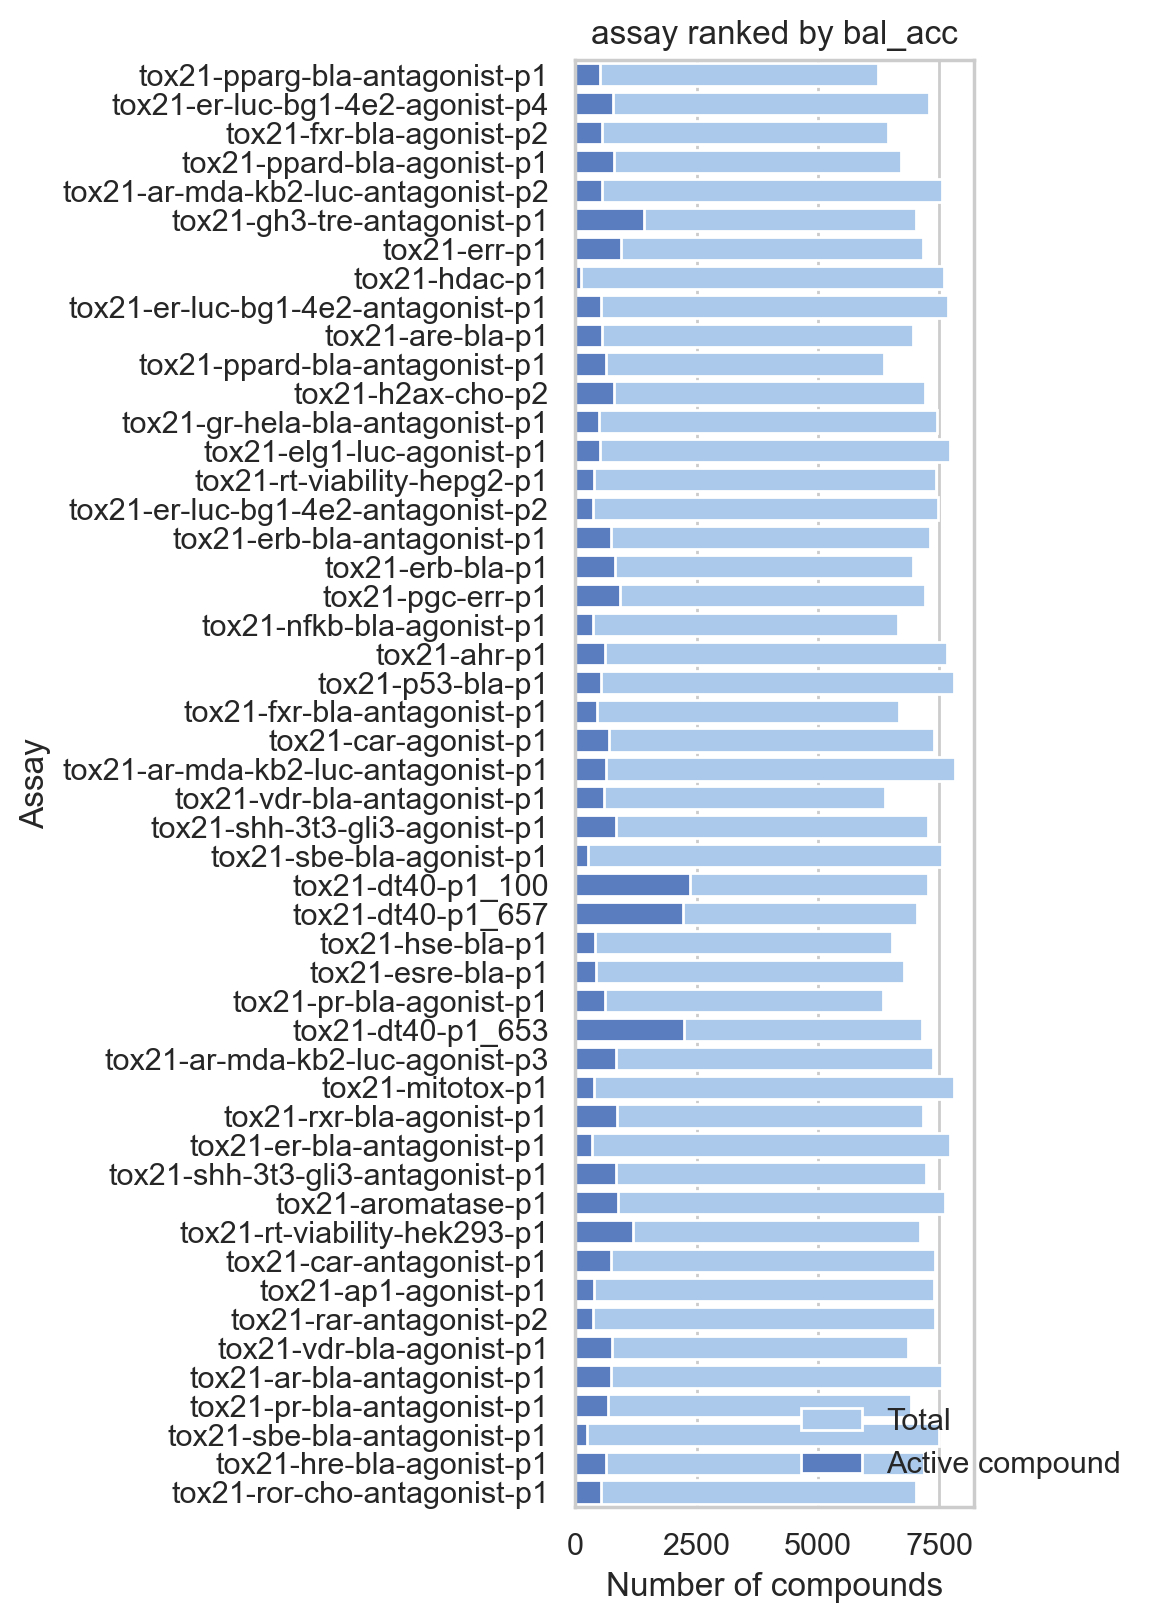

In [55]:
sns.set_theme(style="whitegrid")
new_per_df = new_per_df.sort_values('mean_bal_acc', ascending = False)
values = new_per_df['mean_bal_acc'].round(2)

# plot

f, ax = plt.subplots(figsize = (5,8))

sns.set_color_codes('pastel')
sns.barplot(x = 'number_of_compound', y = 'assay', data = new_per_df,
            label = 'Total', color = 'b', edgecolor = 'w')

for t,b in zip(values.tolist(), ax.patches):
    ax.annotate(values.tolist(),
                (b.get_y() + b.get_height() / 2, b.get_width()+1),
                ha = 'left', va = 'center')


sns.set_color_codes('muted')
sns.barplot(x = 'number_of_active', y = 'assay', data = new_per_df,
            label = 'Active compound', color = 'b', edgecolor = 'w')

ax.legend(loc='lower right', bbox_to_anchor=(1.44, 0.0))
ax.set(xlabel='Number of compounds', ylabel='Assay')



plt.title('assay ranked by bal_acc')
# plt.tight_layout()
# plt.savefig('Figure2.tiff',dpi=300)
plt.show()

In [141]:
values_df = new_per_df[['assay', 'mean_bal_acc']]

In [142]:
assay_score = pd.read_excel('tox21_production_protocols_viability_reproducibility.xlsx')
assay_score = assay_score.rename(columns={'Protocol': 'assay'})
assay_score

assay  Performance Score
0   tox21-ar-mda-kb2-luc-antagonist-p2         101.717182
1                         tox21-pxr-p1         101.324092
2              tox21-car-antagonist-p1         100.237923
3   tox21-ar-mda-kb2-luc-antagonist-p1          99.275915
4      tox21-ar-mda-kb2-luc-agonist-p3          98.965553
5                        tox21-hdac-p1          98.541430
6                 tox21-car-agonist-p1          98.262129
7                 tox21-casp3-hepg2-p1          98.055239
8            tox21-elg1-luc-agonist-p1          97.675305
9               tox21-rar-viability-p2          97.465605
10  tox21-er-luc-bg1-4e2-antagonist-p2          97.341471
11            tox21-sbe-bla-agonist-p1          97.310438
12                    tox21-p53-bla-p1          96.284299
13         tox21-sbe-bla-antagonist-p1          96.244957
14                  tox21-aromatase-p1          96.008003
15          tox21-ar-bla-antagonist-p1          95.998476
16                    tox21-mitotox-p1          95.912729
17       tox21-shh-3t3-gli3-agonist-p1          95.810489
18         tox21-erb-bla-antagonist-p1          95.603600
19                  tox21-casp3-cho-p1          95.500155
20                tox21-ap1-agonist-p1          95.293266
21     tox21-er-luc-bg1-4e2-agonist-p4          95.210510
22  tox21-er-luc-bg1-4e2-antagonist-p1          94.702744
23                        tox21-ahr-p1          93.311738
24            tox21-rxr-bla-agonist-p1          92.779559
25                        tox21-err-p1          92.593359
26                   tox21-h2ax-cho-p2          92.396814
27          tox21-er-bla-antagonist-p1          92.101753
28                    tox21-are-bla-p1          92.045089
29    tox21-shh-3t3-gli3-antagonist-p1          92.003724
30            tox21-vdr-bla-agonist-p1          91.647880
31                    tox21-pgc-err-p1          91.600290
32                   tox21-dt40-p1_100          90.605945
33          tox21-ppard-bla-agonist-p1          90.112721
34     tox21-gr-hela-bla-antagonist-p1          89.986662
35                   tox21-esre-bla-p1          89.275362
36            tox21-hre-bla-agonist-p1          89.158995
37                    tox21-hse-bla-p1          88.030059
38           tox21-nfkb-bla-agonist-p1          87.686527
39          tox21-ror-cho-viability-p1          87.131478
40            tox21-fxr-bla-agonist-p2          84.616210
41         tox21-fxr-bla-antagonist-p1          84.573269
42                    tox21-erb-bla-p1          84.203993
43          tox21-pr-bla-antagonist-p1          83.614358
44       tox21-ppard-bla-antagonist-p1          83.488996
45       tox21-pparg-bla-antagonist-p1          83.242083
46                   tox21-dt40-p1_657          83.022104
47         tox21-vdr-bla-antagonist-p1          81.889426
48         tox21-gh3-tre-antagonist-p1          80.163872
49                   tox21-dt40-p1_653          79.582698
50             tox21-pr-bla-agonist-p1          73.642288

In [143]:
values_df = pd.merge(values_df, assay_score, on="assay")
values_df

assay  mean_bal_acc  Performance Score
0                         tox21-ahr-p1      0.749284          93.311738
1                 tox21-ap1-agonist-p1      0.723887          95.293266
2           tox21-ar-bla-antagonist-p1      0.712101          95.998476
3      tox21-ar-mda-kb2-luc-agonist-p3      0.735994          98.965553
4   tox21-ar-mda-kb2-luc-antagonist-p1      0.745167          99.275915
5   tox21-ar-mda-kb2-luc-antagonist-p2      0.769936         101.717182
6                     tox21-are-bla-p1      0.761154          92.045089
7                   tox21-aromatase-p1      0.730638          96.008003
8                 tox21-car-agonist-p1      0.747621          98.262129
9              tox21-car-antagonist-p1      0.726875         100.237923
10           tox21-elg1-luc-agonist-p1      0.758991          97.675305
11          tox21-er-bla-antagonist-p1      0.732611          92.101753
12     tox21-er-luc-bg1-4e2-agonist-p4      0.787227          95.210510
13  tox21-er-luc-bg1-4e2-antagonist-p1      0.761598          94.702744
14  tox21-er-luc-bg1-4e2-antagonist-p2      0.758260          97.341471
15         tox21-erb-bla-antagonist-p1      0.757328          95.603600
16                    tox21-erb-bla-p1      0.756578          84.203993
17                        tox21-err-p1      0.766860          92.593359
18                   tox21-esre-bla-p1      0.739863          89.275362
19            tox21-fxr-bla-agonist-p2      0.774953          84.616210
20         tox21-fxr-bla-antagonist-p1      0.747828          84.573269
21         tox21-gh3-tre-antagonist-p1      0.768135          80.163872
22     tox21-gr-hela-bla-antagonist-p1      0.759280          89.986662
23                   tox21-h2ax-cho-p2      0.760170          92.396814
24                       tox21-hdac-p1      0.763269          98.541430
25            tox21-hre-bla-agonist-p1      0.690067          89.158995
26                    tox21-hse-bla-p1      0.739974          88.030059
27                    tox21-mitotox-p1      0.734751          95.912729
28           tox21-nfkb-bla-agonist-p1      0.751116          87.686527
29                    tox21-p53-bla-p1      0.747888          96.284299
30                    tox21-pgc-err-p1      0.755939          91.600290
31          tox21-ppard-bla-agonist-p1      0.773479          90.112721
32       tox21-ppard-bla-antagonist-p1      0.760688          83.488996
33       tox21-pparg-bla-antagonist-p1      0.812628          83.242083
34             tox21-pr-bla-agonist-p1      0.736782          73.642288
35          tox21-pr-bla-antagonist-p1      0.704123          83.614358
36            tox21-rxr-bla-agonist-p1      0.732677          92.779559
37            tox21-sbe-bla-agonist-p1      0.742987          97.310438
38         tox21-sbe-bla-antagonist-p1      0.696813          96.244957
39       tox21-shh-3t3-gli3-agonist-p1      0.744026          95.810489
40    tox21-shh-3t3-gli3-antagonist-p1      0.731957          92.003724
41            tox21-vdr-bla-agonist-p1      0.714543          91.647880
42         tox21-vdr-bla-antagonist-p1      0.744742          81.889426
43                   tox21-dt40-p1_653      0.736066          79.582698
44                   tox21-dt40-p1_100      0.742332          90.605945
45                   tox21-dt40-p1_657      0.742066          83.022104

In [145]:
tani_score = pd.read_excel('Tanimoto_Scores (1).xlsx')
tani_score = tani_score.drop(tani_score.columns[0], axis=1)
tani_score.columns = tani_score.iloc[0].reset_index(drop=True)
tani_score = tani_score.iloc[1:,:]
col_name = ['assay', 'avg_all', 'std_all', 'avg_act', 'std_act', 'avg_inact', 'std_inact',
           'avg_act_vs_inact', 'std_act_vs_inact']
tani_score.columns = col_name
tani_score

assay   avg_all   std_all   avg_act  \
1                         tox21.ahr.p1  0.256227  0.164828  0.347437   
2                 tox21.ap1.agonist.p1  0.256947   0.16772   0.30629   
3           tox21.ar.bla.antagonist.p1  0.257771  0.165605  0.303343   
4      tox21.ar.mda.kb2.luc.agonist.p3  0.255831  0.167182  0.328236   
5   tox21.ar.mda.kb2.luc.antagonist.p1  0.258181  0.165024  0.321354   
6   tox21.ar.mda.kb2.luc.antagonist.p2   0.25673  0.167522  0.312924   
7                     tox21.are.bla.p1  0.256589  0.167656  0.299895   
8                   tox21.aromatase.p1  0.257429  0.164916  0.319465   
9                 tox21.car.agonist.p1  0.255269  0.167037  0.311403   
10             tox21.car.antagonist.p1  0.255113  0.167066  0.313557   
11           tox21.elg1.luc.agonist.p1  0.256885  0.164865  0.312742   
12          tox21.er.bla.antagonist.p1  0.259175  0.165403  0.297501   
13     tox21.er.luc.bg1.4e2.agonist.p4  0.253552  0.166824    0.3403   
14  tox21.er.luc.bg1.4e2.antagonist.p1  0.256786  0.164913   0.34296   
15  tox21.er.luc.bg1.4e2.antagonist.p2  0.255921  0.167251  0.332585   
16         tox21.erb.bla.antagonist.p1  0.254728  0.167212  0.310993   
17                    tox21.erb.bla.p1  0.252465    0.1667  0.314144   
18                        tox21.err.p1  0.254149  0.166917  0.330708   
19                   tox21.esre.bla.p1  0.259031  0.167873  0.281124   
20            tox21.fxr.bla.agonist.p2  0.255205  0.167745  0.302953   
21         tox21.fxr.bla.antagonist.p1  0.256017  0.167858   0.27888   
22         tox21.gh3.tre.antagonist.p1  0.256536  0.164802  0.340188   
23     tox21.gr.hela.bla.antagonist.p1   0.25875  0.165589  0.300007   
24                   tox21.h2ax.cho.p2  0.254483  0.167178  0.328185   
25                       tox21.hdac.p1  0.257313  0.167645  0.308596   
26            tox21.hre.bla.agonist.p1  0.256521    0.1676   0.30108   
27                    tox21.hse.bla.p1  0.257418  0.167763  0.270193   
28                    tox21.mitotox.p1  0.258409  0.165315  0.335553   
29           tox21.nfkb.bla.agonist.p1  0.257144   0.16798  0.302531   
30                    tox21.p53.bla.p1  0.258225  0.165164  0.299703   
31                    tox21.pgc.err.p1   0.25464   0.16702  0.321307   
32          tox21.ppard.bla.agonist.p1  0.256087  0.167716  0.305289   
33       tox21.ppard.bla.antagonist.p1  0.256679  0.167556  0.306948   
34       tox21.pparg.bla.antagonist.p1  0.257371  0.168188  0.298694   
35             tox21.pr.bla.agonist.p1  0.249855  0.165751  0.296103   
36          tox21.pr.bla.antagonist.p1  0.254036  0.166557  0.297453   
37             tox21.rar.antagonist.p2  0.256996  0.167441  0.299097   
38         tox21.ror.cho.antagonist.p1  0.253715  0.167324    0.2899   
39            tox21.rxr.bla.agonist.p1  0.255266  0.167133  0.307589   
40            tox21.sbe.bla.agonist.p1  0.257139  0.167758   0.27007   
41         tox21.sbe.bla.antagonist.p1  0.257291   0.16777  0.269871   
42       tox21.shh.3t3.gli3.agonist.p1  0.255846  0.166722  0.318493   
43    tox21.shh.3t3.gli3.antagonist.p1  0.255995  0.167033   0.32889   
44            tox21.vdr.bla.agonist.p1  0.257111  0.167725  0.297061   
45         tox21.vdr.bla.antagonist.p1  0.257389  0.168108  0.303911   
46                   tox21.dt40.p1_653  0.258847  0.165182   0.32674   
47                   tox21.dt40.p1_100  0.258516  0.165379  0.324722   
48                   tox21.dt40.p1_657  0.257671  0.164901  0.319222   
49         tox21.rt.viability.hepg2.p1  0.256326  0.167462  0.288343   
50        tox21.rt.viability.hek293.p1  0.255013  0.166626  0.321371   

     std_act avg_inact std_inact avg_act_vs_inact std_act_vs_inact  
1   0.167722   0.25187  0.163889          0.27726         0.167285  
2   0.180633  0.255196  0.167181         0.271168          0.17121  
3   0.172948  0.254766  0.164938         0.269091         0.167388  
4    0.17208  0.250763  0.166164         0.271237         0.168856  
5   0.169397  0

In [146]:
tani_score['diff_act_vs_inact'] = tani_score['avg_act'] - tani_score['avg_inact']
tani_score

assay   avg_all   std_all   avg_act  \
1                         tox21.ahr.p1  0.256227  0.164828  0.347437   
2                 tox21.ap1.agonist.p1  0.256947   0.16772   0.30629   
3           tox21.ar.bla.antagonist.p1  0.257771  0.165605  0.303343   
4      tox21.ar.mda.kb2.luc.agonist.p3  0.255831  0.167182  0.328236   
5   tox21.ar.mda.kb2.luc.antagonist.p1  0.258181  0.165024  0.321354   
6   tox21.ar.mda.kb2.luc.antagonist.p2   0.25673  0.167522  0.312924   
7                     tox21.are.bla.p1  0.256589  0.167656  0.299895   
8                   tox21.aromatase.p1  0.257429  0.164916  0.319465   
9                 tox21.car.agonist.p1  0.255269  0.167037  0.311403   
10             tox21.car.antagonist.p1  0.255113  0.167066  0.313557   
11           tox21.elg1.luc.agonist.p1  0.256885  0.164865  0.312742   
12          tox21.er.bla.antagonist.p1  0.259175  0.165403  0.297501   
13     tox21.er.luc.bg1.4e2.agonist.p4  0.253552  0.166824    0.3403   
14  tox21.er.luc.bg1.4e2.antagonist.p1  0.256786  0.164913   0.34296   
15  tox21.er.luc.bg1.4e2.antagonist.p2  0.255921  0.167251  0.332585   
16         tox21.erb.bla.antagonist.p1  0.254728  0.167212  0.310993   
17                    tox21.erb.bla.p1  0.252465    0.1667  0.314144   
18                        tox21.err.p1  0.254149  0.166917  0.330708   
19                   tox21.esre.bla.p1  0.259031  0.167873  0.281124   
20            tox21.fxr.bla.agonist.p2  0.255205  0.167745  0.302953   
21         tox21.fxr.bla.antagonist.p1  0.256017  0.167858   0.27888   
22         tox21.gh3.tre.antagonist.p1  0.256536  0.164802  0.340188   
23     tox21.gr.hela.bla.antagonist.p1   0.25875  0.165589  0.300007   
24                   tox21.h2ax.cho.p2  0.254483  0.167178  0.328185   
25                       tox21.hdac.p1  0.257313  0.167645  0.308596   
26            tox21.hre.bla.agonist.p1  0.256521    0.1676   0.30108   
27                    tox21.hse.bla.p1  0.257418  0.167763  0.270193   
28                    tox21.mitotox.p1  0.258409  0.165315  0.335553   
29           tox21.nfkb.bla.agonist.p1  0.257144   0.16798  0.302531   
30                    tox21.p53.bla.p1  0.258225  0.165164  0.299703   
31                    tox21.pgc.err.p1   0.25464   0.16702  0.321307   
32          tox21.ppard.bla.agonist.p1  0.256087  0.167716  0.305289   
33       tox21.ppard.bla.antagonist.p1  0.256679  0.167556  0.306948   
34       tox21.pparg.bla.antagonist.p1  0.257371  0.168188  0.298694   
35             tox21.pr.bla.agonist.p1  0.249855  0.165751  0.296103   
36          tox21.pr.bla.antagonist.p1  0.254036  0.166557  0.297453   
37             tox21.rar.antagonist.p2  0.256996  0.167441  0.299097   
38         tox21.ror.cho.antagonist.p1  0.253715  0.167324    0.2899   
39            tox21.rxr.bla.agonist.p1  0.255266  0.167133  0.307589   
40            tox21.sbe.bla.agonist.p1  0.257139  0.167758   0.27007   
41         tox21.sbe.bla.antagonist.p1  0.257291   0.16777  0.269871   
42       tox21.shh.3t3.gli3.agonist.p1  0.255846  0.166722  0.318493   
43    tox21.shh.3t3.gli3.antagonist.p1  0.255995  0.167033   0.32889   
44            tox21.vdr.bla.agonist.p1  0.257111  0.167725  0.297061   
45         tox21.vdr.bla.antagonist.p1  0.257389  0.168108  0.303911   
46                   tox21.dt40.p1_653  0.258847  0.165182   0.32674   
47                   tox21.dt40.p1_100  0.258516  0.165379  0.324722   
48                   tox21.dt40.p1_657  0.257671  0.164901  0.319222   
49         tox21.rt.viability.hepg2.p1  0.256326  0.167462  0.288343   
50        tox21.rt.viability.hek293.p1  0.255013  0.166626  0.321371   

     std_act avg_inact std_inact avg_act_vs_inact std_act_vs_inact  \
1   0.167722   0.25187  0.163889          0.27726         0.167285   
2   0.180633  0.255196  0.167181         0.271168          0.17121   
3   0.172948  0.254766  0.164938         0.269091         0.167388   
4    0.17208  0.250763  0.166164         0.271237         0.168856   
5   0.1693

In [148]:
tani_score['assay'] = tani_score['assay'].str.replace('.','-')
values_df = pd.merge(values_df, tani_score, on="assay")
values_df

/var/folders/q3/4xkzknpn01j0stqqmhhm0jpr0000gn/T/ipykernel_30565/3742352626.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tani_score['assay'] = tani_score['assay'].str.replace('.','-')


assay  mean_bal_acc  Performance Score  \
0                         tox21-ahr-p1      0.749284          93.311738   
1                 tox21-ap1-agonist-p1      0.723887          95.293266   
2           tox21-ar-bla-antagonist-p1      0.712101          95.998476   
3      tox21-ar-mda-kb2-luc-agonist-p3      0.735994          98.965553   
4   tox21-ar-mda-kb2-luc-antagonist-p1      0.745167          99.275915   
5   tox21-ar-mda-kb2-luc-antagonist-p2      0.769936         101.717182   
6                     tox21-are-bla-p1      0.761154          92.045089   
7                   tox21-aromatase-p1      0.730638          96.008003   
8                 tox21-car-agonist-p1      0.747621          98.262129   
9              tox21-car-antagonist-p1      0.726875         100.237923   
10           tox21-elg1-luc-agonist-p1      0.758991          97.675305   
11          tox21-er-bla-antagonist-p1      0.732611          92.101753   
12     tox21-er-luc-bg1-4e2-agonist-p4      0.787227          95.210510   
13  tox21-er-luc-bg1-4e2-antagonist-p1      0.761598          94.702744   
14  tox21-er-luc-bg1-4e2-antagonist-p2      0.758260          97.341471   
15         tox21-erb-bla-antagonist-p1      0.757328          95.603600   
16                    tox21-erb-bla-p1      0.756578          84.203993   
17                        tox21-err-p1      0.766860          92.593359   
18                   tox21-esre-bla-p1      0.739863          89.275362   
19            tox21-fxr-bla-agonist-p2      0.774953          84.616210   
20         tox21-fxr-bla-antagonist-p1      0.747828          84.573269   
21         tox21-gh3-tre-antagonist-p1      0.768135          80.163872   
22     tox21-gr-hela-bla-antagonist-p1      0.759280          89.986662   
23                   tox21-h2ax-cho-p2      0.760170          92.396814   
24                       tox21-hdac-p1      0.763269          98.541430   
25            tox21-hre-bla-agonist-p1      0.690067          89.158995   
26                    tox21-hse-bla-p1      0.739974          88.030059   
27                    tox21-mitotox-p1      0.734751          95.912729   
28           tox21-nfkb-bla-agonist-p1      0.751116          87.686527   
29                    tox21-p53-bla-p1      0.747888          96.284299   
30                    tox21-pgc-err-p1      0.755939          91.600290   
31          tox21-ppard-bla-agonist-p1      0.773479          90.112721   
32       tox21-ppard-bla-antagonist-p1      0.760688          83.488996   
33       tox21-pparg-bla-antagonist-p1      0.812628          83.242083   
34             tox21-pr-bla-agonist-p1      0.736782          73.642288   
35          tox21-pr-bla-antagonist-p1      0.704123          83.614358   
36            tox21-rxr-bla-agonist-p1      0.732677          92.779559   
37            tox21-sbe-bla-agonist-p1      0.742987          97.310438   
38         tox21-sbe-bla-antagonist-p1      0.696813          96.244957   
39       tox21-shh-3t3-gli3-agonist-p1      0.744026          95.810489   
40    tox21-shh-3t3-gli3-antagonist-p1      0.731957          92.003724   
41            tox21-vdr-bla-agonist-p1      0.714543          91.647880   
42         tox21-vdr-bla-antagonist-p1      0.744742          81.889426   
43                   tox21-dt40-p1_653      0.736066          79.582698   
44                   tox21-dt40-p1_100      0.742332          90.605945   
45                   tox21-dt40-p1_657      0.742066          83.022104   

     avg_all   std_all   avg_act   std_act avg_inact std_inact  \
0   0.256227  0.164828  0.347437  0.167722   0.25187  0.163889   
1   0.256947   0.16772   0.30629  0.180633  0.255196  0.167181   
2   0.257771  0.165605  0.303343  0.172948  0.254766  0.164938   
3   0.255831  0.167182  0.328236   0.17208  0.250763  0.166164   
4   0.258181  0.165024  0.321354  0.169397  0.254908  0.164594   
5    0.25673  0.167522  0.312924  0.176859  0.254423   0.16704   
6   0.256589  0.167656  0.299895  0.176081  0

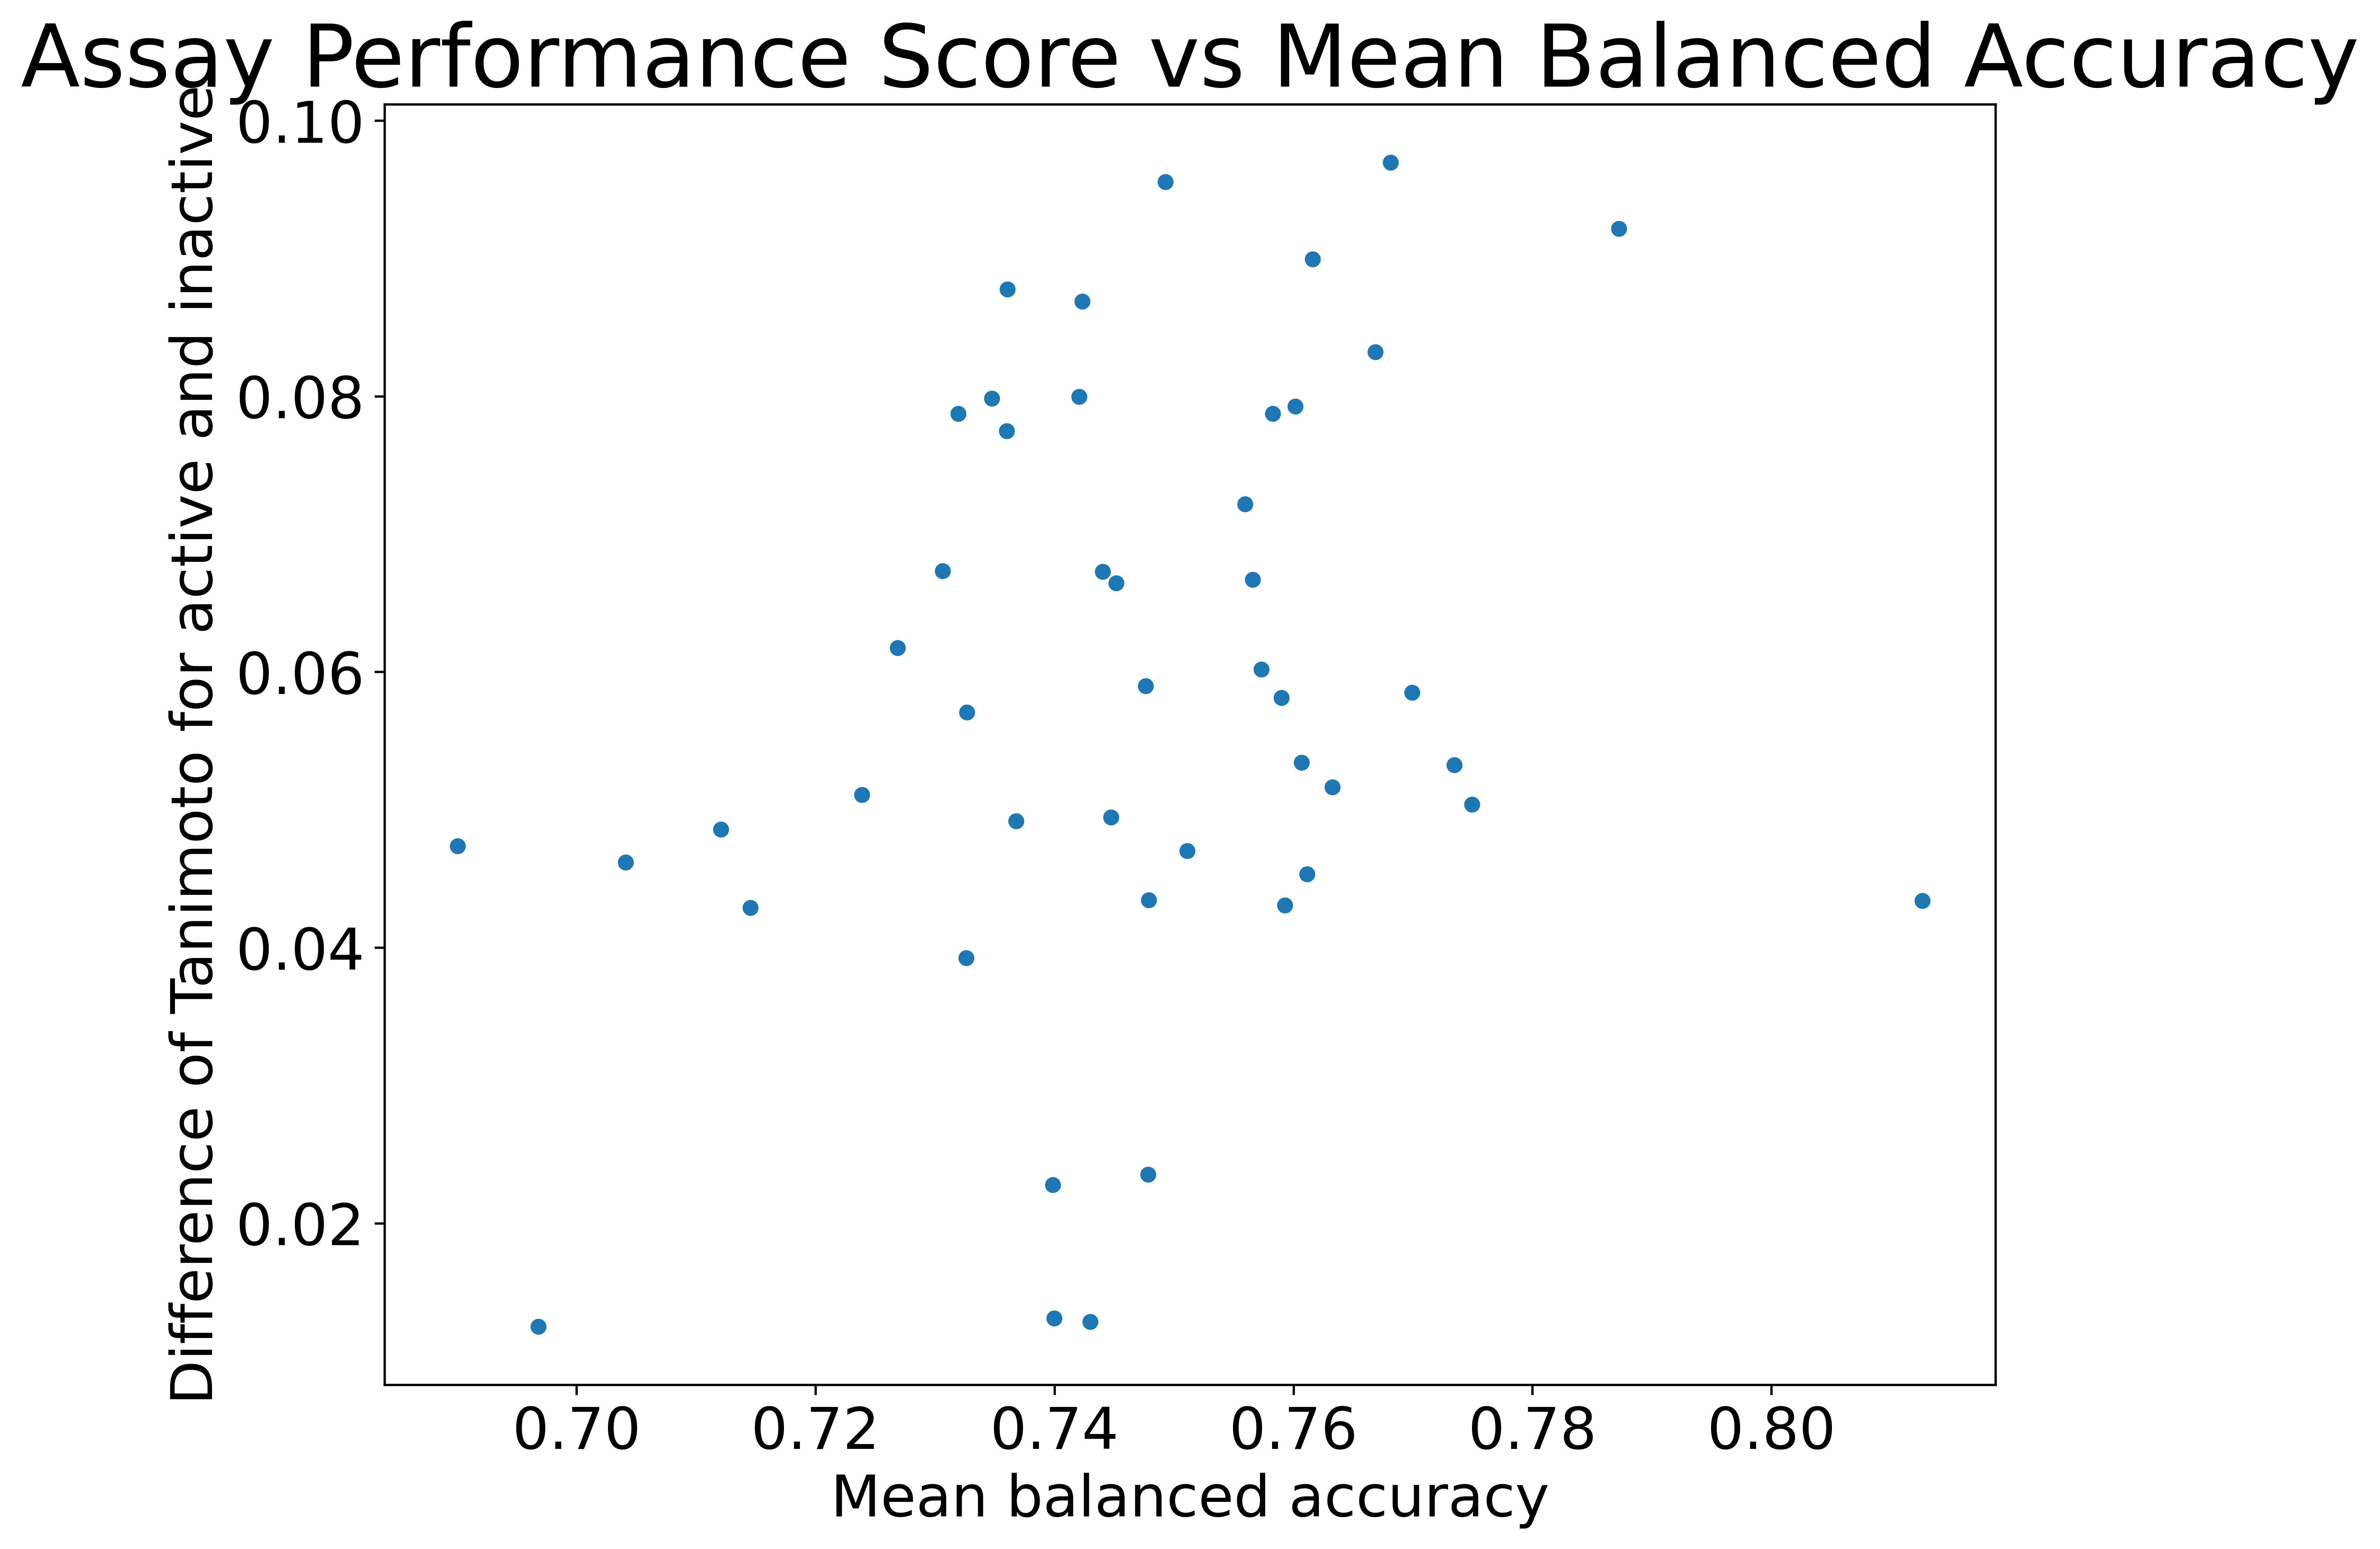

In [150]:
plt.figure(figsize=(10,8))
g = sns.scatterplot(data=values_df, y="diff_act_vs_inact", x="mean_bal_acc")
g.axes.set_title("Assay Performance Score vs Mean Balanced Accuracy",fontsize=30)
g.set_ylabel("Difference of Tanimoto for active and inactive",fontsize=20)
g.set_xlabel("Mean balanced accuracy",fontsize=20)
g.tick_params(labelsize=20)
# g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=20)
plt.show()

In [162]:
values_df.corr(method='pearson')

/var/folders/q3/4xkzknpn01j0stqqmhhm0jpr0000gn/T/ipykernel_30565/3071383189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  values_df.corr(method='pearson')


mean_bal_acc  Performance Score  diff_act_vs_inact
mean_bal_acc           1.000000          -0.080171           0.270747
Performance Score     -0.080171           1.000000           0.044787
diff_act_vs_inact      0.270747           0.044787           1.000000

In [161]:
values_df['diff_act_vs_inact'] = values_df['diff_act_vs_inact'].astype('float')